# **Deep Learning Project: Facial Recognition**

# Capstone Project (Full-code) - Fé Valvekens, August 2023

----------------------------
## **Executive Summary**
----------------------------

This deep learning project proposes the Complex Convolutional Neural Network (CNN) for the accurate detection of facial emotions. The dataset provided to train the models is composed of small size grayscale images of faces expressing four types of emotion: happy, sad, neutral or surprised. Using Transfer Learning did not prove beneficial in classifying the images of the given dataset. The performance of these pre-built architectures was lower than expected so building a more complex but flexible CNN model was the best approach to work with the specific dataset. The suggested model achieved high performance with 82% accuracy. However, it is subject to a number of limitations, including  the lower accuracy in predicting certain classes, and when facial occlusion is present. Its computation efficiency is also linked to the volume and size of images to be processed. It is recommended that stakeholders consider these limitations and challenges in building an improved and robust predictive model, as well as use a larger and more diverse training dataset, explore data augmentation techniques to improve the model’s accuracy and evaluate the trade off of developing a more complex but more computationally expensive model.



----------------------------
## **1. Problem Definition**
----------------------------


###**1.1 The context**<br>

Non verbal communication have a greater impact than the actual verbal communication. A study by Mehrabian in 1967 [1] indicates that 55% of emotional information are visual, 38% vocal and 7% verbal. **Affective Computing**, also known as **Emotion Artificial Intelligence** is a rapidly developing field of computer science. Today, as we interact more frequently with machines including computer, smartphones, chatbots, self-service kiosks, understanding our facial expressions is critical to improve the human machine interaction. Training a model to read human facial emotions with accuracy could help machines develop emotional intelligence and find applications in various fields such as education, healthcare and security [2].

###**1.2 The objectives**<br>

The intended goal of this project is to create and train a computer vision model that can **accurately detect facial emotions**, using Deep Learning techniques. The model should be able to classify the images of facial emotions (input) into the correct category of emotion associated with the image (output). In other words, the trained model should be able to predict the emotions of new, unseen images.

###**1.3 The key questions**<br>

- What data will be used to train the model?<br>
- How is the data structured? What is the shape of the dataset?<br>
- Is there imbalance in the classes in the target variable?<br>
- Are there distinct features for each class?<br>
- What model architectures will be used?<br>
- What data preprocessing steps are required?<br>
- How shall we evaluate each model? Which metric shall be used?<br>
- Which model is chosen to solve this task and why?<br>



###**1.4 The problem formulation**<br>

We are trying to solve a multi-class classification problem. We shall use Data Science techniques such as Deep Learning architectures including Convolutional Neural Networks (CNN) to develop a model that can automatically detect and classify facial expressions based on patterns in the data. We shall train the Deep Learning model on a large dataset of facial images that are already categorised by emotion so that the trained model is able to classify unseen data into the correct emotion.

##**About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has four subfolders containing jpeg files:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>

## **Mounting the Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Importing the Libraries**

In [ ]:
import keras

# Library for performing numerical computations and using dataframes
import numpy as np
import pandas as pd

# Library for creating data paths
import os

# Library for unzipping files
import zipfile

# For Data Visualization
import cv2
import seaborn as sns
import matplotlib.pyplot as plt

# Library for randomly selecting data points
import random

# Library for reading and showing images
import matplotlib.image as mpimg

# For Model Building
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential, Model                           # Sequential api for sequential model
from tensorflow.keras.layers import Dense, Dropout, Flatten                     # Importing all the different layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU, Activation
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical                               # To perform one-hot encoding
from tensorflow.keras.optimizers import Adam, Adamax, SGD                       # Optimizers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping                            # Regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import losses, optimizers
from tensorflow.keras.preprocessing.image import load_img
from google.colab.patches import cv2_imshow

# For Reporting
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Data augmentation and data loading
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# For pre-trained models
from tensorflow.keras import Model
from keras.applications.vgg16 import VGG16
from keras.applications.resnet_v2 import ResNet101V2
from keras.applications.efficientnet import EfficientNetB7




**Let us check the version of tensorflow.**

In [ ]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.12.0


--------------------------
## **2. Data Exploration**
--------------------------

### **2.1 Let us load and unzip the data**

In [ ]:
# Storing the path of the data file from the Google drive
zip_dir = '/content/drive/MyDrive/MIT Applied DS/Capstone/Facial_emotion_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(zip_dir, 'r') as zip_ref:
    zip_ref.extractall()

### **2.2 Data Description**

The dataset consists of three folders:
- **test**
- **train**
- **validation**

Each of these folders contains four subfolders:
- **happy**: images in jpeg of people showing happy facial expressions
- **sad**: images in jpeg of people showing sad facial expressions
- **surprise**: images in jpeg of people showing shocked or surprised facial expressions
- **neutral**: images in jpeg of people showing no prominent emotion in their facial expression at all

### **2.3 Visualizing our Classes**

Let's look at our classes by randomly selecting 9 images in each class. Before doing this, let's create a path to the each folder containing the train, validation and test dataset and a variable 'categories' containing the list of the 4 labels.


In [ ]:
# Storing paths to each dataset in a variable, and storing the unique categories/labels in a list

train_dir = '/content/drive/MyDrive/MIT Applied DS/Capstone/Facial_emotion_images/train'
validation_dir = '/content/drive/MyDrive/MIT Applied DS/Capstone/Facial_emotion_images/validation'
test_dir = '/content/drive/MyDrive/MIT Applied DS/Capstone/Facial_emotion_images/test'

categories = ['happy', 'neutral', 'sad', 'surprise']

# Storing path where the models will be saved
save_dir = '/content/drive/MyDrive/MIT Applied DS/Capstone/BestModels'

#### **Happy**

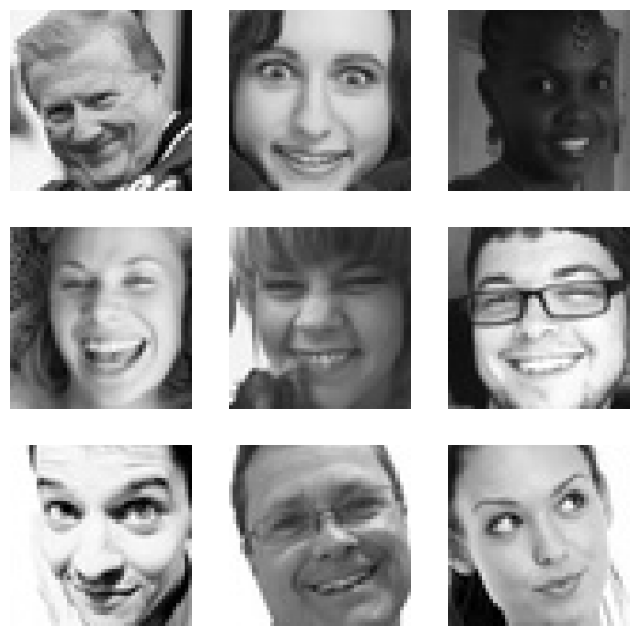

In [ ]:
# Let us store every file name that is in the subfolder 'happy'({categories[0]}) in the folder 'train' {train_dir}
happy_imgs = [fn for fn in os.listdir(f'{train_dir}/{categories[0]}') ]

# Let us radomly select 9 file names from the above list
select_happy = np.random.choice(happy_imgs, 9, replace = False)                 # replace=False to avoid selecting duplicates

# Let us plot the images corresponding to these selected files names
fig = plt.figure(figsize = (8, 8))

for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1)                                           # Creating a sub plot of 3 columns and 3 rows

    fp = f'{train_dir}/{categories[0]}/{select_happy[i]}'                       # file path to locate the file

    fn = load_img(fp, target_size = (150, 150))                                 # load the image with a specified target size

    plt.imshow(fn)                                                              # display the image

    plt.axis('off')                                                             # hide the unecessary axis

plt.show()

**Observations and Insights:**

- The images selected are in grayscale.

- We observe that faces belong to subjects of different age, gender and ethnicity. Some subjects are wearing accessories such as glasses or a hat. Some subjects have make up and face paint.

- Some backgrounds are white or another solid color, others are not.

- The faces are of different sizes, and are tilted at different angles.

- A **distinct feature for the 'happy'** emotion could be the combination of tightened muscles around the eye, “crows feet” wrinkles around the eyes, cheeks raised, lip corners raised diagonally.

#### **Sad**

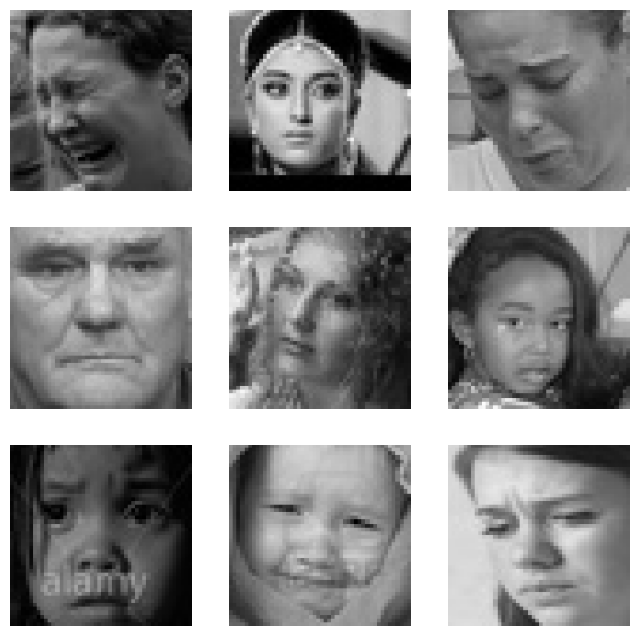

In [ ]:
# Let us store every file name that is in the subfolder 'sad'({categories[2]}) in the folder 'train' {train_dir}
sad_imgs = [fn for fn in os.listdir(f'{train_dir}/{categories[2]}') ]

# Let us radomly select 9 file names from the above list
select_sad = np.random.choice(sad_imgs, 9, replace = False)

# Let us plot the images corresponding to these selected files names
fig = plt.figure(figsize = (8, 8))

for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1)

    fp = f'{train_dir}/{categories[2]}/{select_sad[i]}'

    fn = load_img(fp, target_size = (150, 150))

    plt.imshow(fn)

    plt.axis('off')

plt.show()

**Observations and Insights:**

- We make the same observations as for the 'happy' class regarding the image color, the subjects' age, gender, ethnicity, accessories, background, face size and tilt, and text in the image. This seems to be consistent across all classes.

- A **distinct feature for the 'sad'** emotion could be the combination of drooping eyelids, downcast eyes, lowered lip corners, and slanting inner eyebrows

#### **Neutral**

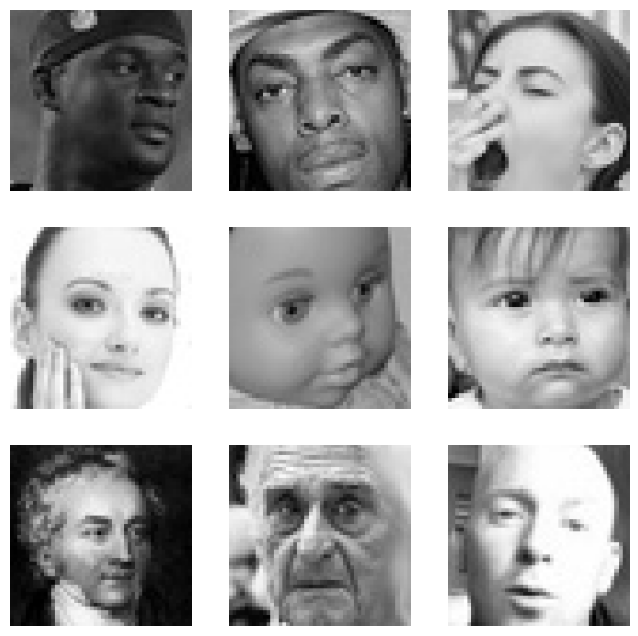

In [ ]:
# Let us store every file name that is in the subfolder 'neutral'({categories[1]}) in the folder 'train' {train_dir}
neutral_imgs = [fn for fn in os.listdir(f'{train_dir}/{categories[1]}') ]

# Let us radomly select 9 file names from the above list
select_neutral = np.random.choice(neutral_imgs, 9, replace = False)

# Let us plot the images corresponding to these selected files names
fig = plt.figure(figsize = (8, 8))

for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1)

    fp = f'{train_dir}/{categories[1]}/{select_neutral[i]}'

    fn = load_img(fp, target_size = (150, 150))

    plt.imshow(fn)

    plt.axis('off')

plt.show()

**Observations and Insights:**

- We make the same observations as for the 'happy' class regarding the image color, the subjects' age, gender, ethnicity, accessories, background, face size and tilt, and text in the image. This seems to be consistent across all classes.

- We observe that the subject can be a baby doll and a painting of a face.

- We observe that two images have a hand present: one covering the mouth (yawning), and one on the subject's cheek. The emotion of the person yawning is not quite clear, this could be confusing for our model to learn.

- A **distinct feature for the 'neutral'** emotion could be the absence of muscles tightening, relaxed features.

#### **Surprise**

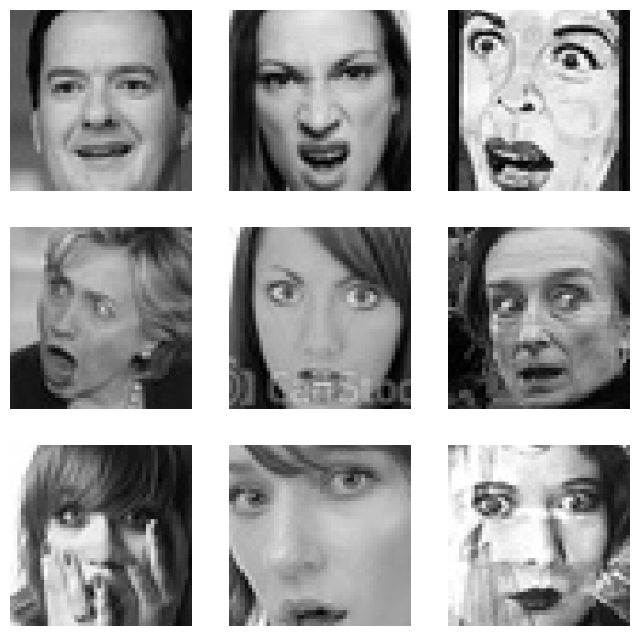

In [ ]:
# Let us store every file name that is in the subfolder 'surprise'({categories[3]}) in the folder 'train' {train_dir}
surprise_imgs = [fn for fn in os.listdir(f'{train_dir}/{categories[3]}') ]

# Let us radomly select 9 file names from the above list
select_surprise = np.random.choice(surprise_imgs, 9, replace = False)

# Let us plot the images corresponding to these selected files names
fig = plt.figure(figsize = (8, 8))

for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1)

    fp = f'{train_dir}/{categories[3]}/{select_surprise[i]}'

    fn = load_img(fp, target_size = (150, 150))

    plt.imshow(fn)

    plt.axis('off')

plt.show()

**Observations and Insights:**

- We make the same observations as for the 'happy' class regarding the image color, the subjects' age, gender, ethnicity, accessories, background, face size and tilt, and text in the image. This seems to be consistent across all classes.

- We observe that there are different types of surprise: the happy surprise versus the frightened surprise. This could potentially be a difficult feature to learn.

- A **distinct feature for the 'surprised'** emotion could be the wide open eyes, the raised eyebrows and jaws drop open.

### **2.4 Checking Distribution of Classes**

Let's check whether there are any balances in the training dataset as this might affect the learning of our models.

In [ ]:
# Printing the value counts of target variable

# Getting count of images in each folder within our training path
num_happy = len(os.listdir(train_dir + "/happy"))
print("Number of images in the class 'happy':   ", num_happy)

num_sad = len(os.listdir(train_dir + "/sad"))
print("Number of images in the class 'sad':   ", num_sad)

num_neutral = len(os.listdir(train_dir + "/neutral"))
print("Number of images in the class 'neutral':   ", num_neutral)

num_surprise = len(os.listdir(train_dir + "/surprise"))
print("Number of images in the class 'suprise':   ", num_surprise)


Number of images in the class 'happy':    3976
Number of images in the class 'sad':    3982
Number of images in the class 'neutral':    3978
Number of images in the class 'suprise':    3173


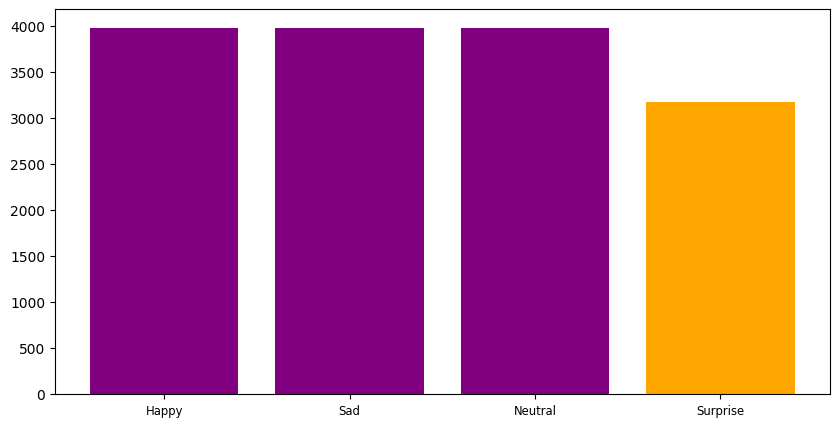

In [ ]:
# Let us plot the distribution of classes in the training dataset

plt.figure(figsize = (10, 5))

data = {'Happy': num_happy, 'Sad': num_sad, 'Neutral': num_neutral, 'Surprise' : num_surprise}

df = pd.Series(data)

plt.bar(range(len(df)), df.values, align = 'center', color = ['purple', 'purple', 'purple', 'orange'])

plt.xticks(range(len(df)), df.index.values, size = 'small')

plt.show()


**Observations and Insights:**

- the classes 'happy', 'sad' and 'neutral' are quite equally distributed with an average of 3,978 files.
- the class 'surprise' contains less files: 3,173 which is around 20% less from the average, which is not significant, so should not be a problem as we progress.

**Class distribution**

There is a **slight imbalance** for one class out of the four, the class 'surprise'. Given the delta (20% less), this sould not be a problem.

**EDA tasks**

There are other EDA tasks that can be done, and can provide meaningful insights:
  - checking the number of images in each dataset
  - checking the shape of the dataset
  - checking the color mode of the images

### **2.5 Checking the number of images per train, validation and test dataset**

In [ ]:
 # Defining a function to count the number of files in a folder that has subfolders

def count_files(folder_path):
    file_count = 0

    # Iterate over the files and subfolders in the folder
    for root, dirs, files in os.walk(folder_path):

        file_count += len(files)  # Add the number of files in the current folder

    return file_count

# Calling this function to count the number of files in the train dataset
num_train = count_files(train_dir)

# Print the number of files
print("Number of files in train dataset:", num_train)

# Calling this function to count the number of files in the validation dataset
num_validation = count_files(validation_dir)
print("Number of files in validation dataset:", num_validation)

# Calling this function to count the number of files in the test dataset
num_test = count_files(test_dir)
print("Number of files in test dataset:", num_test)

Number of files in train dataset: 15109
Number of files in validation dataset: 4977
Number of files in test dataset: 128


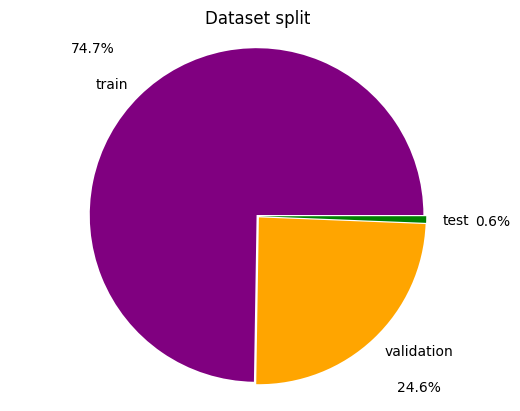

In [ ]:
# Let's plot the distribution of files per dataset

labels = ['train', 'validation', 'test']
sizes = [num_train, num_validation,num_test]  # Represents the percentage or size of each category
explode = (0.01, 0.01, 0.01)  # Separation slices
colors=['purple', 'orange', 'green']

# Plotting the pie chart
plt.pie(sizes, labels=labels, explode=explode, colors = colors, autopct='%1.1f%%',pctdistance=1.4)

# Aspect ratio to make the pie chart a circle
plt.axis('equal')

# Adding a title
plt.title('Dataset split')

# Display the chart
plt.show()

**Observations and Insights:**

*  We have three datasets:
  - train contains 15,109 images (around 74.7%),
  - validation contains 4,977 images (around 24.6%),
  - test contains 128 images (around 0.6%).
*  We shall therefore
  - **train the model on the training dataset**,
  - monitor the performance of the model on the **validation dataset** during training to **tune hyperparameters** and prevent underfitting/overfitting,
  - **evaluate the model on the test dataset** using the metric '**accuracy**', to see how the model classifies unseen images

### **2.6 Checking the shape of the training dataset**

In [ ]:
img_shapes=[]

for category in categories:
    for filename in os.listdir(os.path.join(train_dir, category)):

      # Construct the path to the image file
      img_path = os.path.join(train_dir, category, filename)

      # Load the image
      img = cv2.imread(img_path)

      # Get the shape of the image and append it to the list
      img_shapes.append(img.shape)

    # Check whether all images have the same shape
    print('file shapes in folder',category, set(img_shapes))


file shapes in folder happy {(48, 48, 3)}
file shapes in folder neutral {(48, 48, 3)}
file shapes in folder sad {(48, 48, 3)}
file shapes in folder surprise {(48, 48, 3)}


**Observations and Insights:**

*  All images in the training dataset have **the same shape: (48,48,3)**, which means that the size (width x height) of the images is **48 x 48 pixel and that each image has 3 color channels**.
* the size of the images is **quite small** so this could be a problem: the filters in a CNN may not be able to capture enough information from the image to identify patterns and features accurately resulting in a loss of important information. Furthermore, some Transfer Learning pre-built models may require a minimum input size to operate effectively.

In [ ]:
# Checking the RGB values of a random image

# Let us radomly select 1 file name from the sub folder 'happy'
select_img = np.random.choice(happy_imgs, 1, replace = False)

fp = f'{train_dir}/{categories[0]}/{select_img[0]}'                             # file path to locate the file

# Load the image using cv2.imread()
fn = cv2.imread(fp)

#plt.imshow(fn)

# Split the image into its color channels
b, g, r = cv2.split(fn)

# Display the pixel values of the color channels
print('Blue channel:\n', b)
print('Green channel:\n', g)
print('Red channel:\n', r)

# Check if all three channels have the same values
if np.array_equal(b, g) and np.array_equal(g, r):
    print("All three channels have the same values")
else:
    print("The RGB values in each channel are not the same")

Blue channel:
 [[ 35  31  33 ...  17  20  19]
 [ 31  35  40 ...  24  21  19]
 [ 28  40  58 ...  36  21  19]
 ...
 [150 151 147 ... 127 116 103]
 [159 150 146 ... 135 126 115]
 [155 144 161 ... 140 135 127]]
Green channel:
 [[ 35  31  33 ...  17  20  19]
 [ 31  35  40 ...  24  21  19]
 [ 28  40  58 ...  36  21  19]
 ...
 [150 151 147 ... 127 116 103]
 [159 150 146 ... 135 126 115]
 [155 144 161 ... 140 135 127]]
Red channel:
 [[ 35  31  33 ...  17  20  19]
 [ 31  35  40 ...  24  21  19]
 [ 28  40  58 ...  36  21  19]
 ...
 [150 151 147 ... 127 116 103]
 [159 150 146 ... 135 126 115]
 [155 144 161 ... 140 135 127]]
All three channels have the same values


**Observations and Insights:**

- After splitting the image into its color channels using the function **cv2.split**, we observe that the RGB values in each channel are the same for a randome image selected.

- This is consistent with the visualization of the random images, indeed all the images we have seen are in **black and white**. So although each image has 3 color channels, the RGB values in each channel are the same, which explains why the image is in grayscale.

- Therefore, there is no additional value in having a grayscale image in a three channel color format (repeated information) but there could be a benefit to have an input image in a format with 3 channels vs. 1 channel. Let us keep this is mind as we explore several models.

**Final Observations:**

* The training dataset is **slightly imbalanced** with:
  - 26% of images belonging to the class 'sad',
  - 26% to the class 'happy',
  - 26% to the class 'surprise',
  - 21% to the class 'surprise'.

The imbalance is not significant, so should not be a problem as we progress.

*  We have three datasets:
  - train contains 15,109 images (around 74.7%),
  - validation contains 4,977 images (around 24.6%),
  - test contains 128 images (around 0.6%).

*  All images in the training dataset have **the same shape: (48,48,3)**, which means that the (width x height) size of the images is **48 x 48 pixel and that each image has 3 color channels**. In a 3-channel color image, each pixel is represented by three color values: red, green, and blue (RGB) in that order. The pixel values are usually represented as integers in the range 0-255, where 0 represents the absence of that color and 255 represents the maximum intensity of that color.

* When we checked the RGB values of a random image, we observed that the RGB values in each channel are the same. **So although each image has 3 color channels, all three color channels (red, green, and blue) have the same intensity value** which explains why the image is in grayscale.

* When we visualized random images for each class, we noted that:
  - images are in grayscale
  - faces belong to subjects of different age, gender and ethnicity. Some subjects are wearing accessories such as glasses, hood, a head piece or a hat. Some subjects have make up or face paint.
  - one subject has her hand placed the bottom cheek
  - some images are a painting of a face, and some are a sketch of a face
  - one subject is a picture of a baby doll
  - faces are of different sizes, and are tilted at different angles.
  - some backgrounds are white or another solid color, others are not.
  - some images have text on them like a watermark over the face

* Here are **distinct features we observed for each class**:
  - happy:  tightened muscles around the eye, “crows feet” wrinkles around the eyes, cheeks raised, lip corners raised diagonally
  - sad: drooping eyelids, downcast eyes, lowered lip corners, and slanting inner eyebrows
  - neutral: absence of muscles tightening, relaxed features
  - surprise: wide open eyes, the raised eyebrows and jaws drop open
However, one could question how distinct these features are. There seems **to be some "outliers" among the images we have visualised randomly**: is figure (a) below someone who has a neutral expression? is figure (b) someone expressing sadness or not expressing a particular emotion (neutral)?



We are now ready to build our model.

![picture](https://drive.google.com/uc?id=1CLzWR0KTjBAirGcxizCy4Td3TULUWc8s)

## **Workflow Summary**

Below is a diagram explaining our workflow. We shall build different 6 models, train each model on the training dataset, monitor the performance of the model on the validation dataset and evaluate the model on the test dataset using the **metric 'accuracy'**.

We shall use the color modes **grayscale (g) and RGB (rgb)** for the input images of our model and see which color mode gives the best performance. For the Transfer Learning Architecture models, only RGB color mode will be used. We shall use Data Loaders to load and preprocess image data efficiently and effectively.

During training, we shall use the **categorical cross-entropy** loss function because the task is a multi class prediction. The loss is the difference between the true class probabilities and the predicted class probabilities.

Then we shall **compare and evaluate each model**, and choose the best one to solve our task.

Finally, with the chosen model, we will predict the classes of emotions on the test data and generate a **classification report and a confusion matrix** to gain more insight on the performance of the chosen model and identify areas we can improve.

![picture](https://drive.google.com/uc?id=1rz0NHr2bhyLQf6aR-oP6i_9jOtLzU_hc)




## **General Design steps**
The modelling part (see blue blox in the above diagram) is **an iterative process**.

In the first iteration, we will run the model with a  set of parameters that we shall use as a start. We will build and compile the model with the Adam optimiser (learning rate = 0.001). We shall fit the model with a batch size of 32, number of epochs 30.

At the end of our first iteration, we shall plot the training and validation accuracies to evaluate how our model is learning and performing. Then we shall evaluate our model's performance on unseen data. Based on the performance, we shall make changes to our base model, which could include:
  - adding more layers to increase the complexity of our model if the plot shows that our model is underfitting
  - using regularisation techniques to prevent the overfitting of our model if we see that our model is performing better on training data than on validation
  - changing the activation function
  - changing the size of the kernels in our convolutional layers

On the following iterations, we shall also tune the hyper parameters of our model to improve its performance by changing:
  - the batch size when we fit our model
  - the type of optimizer and / or learning rate
  - the number of epochs

At every iteration, we shall record the results obtained along with the changes we made on the model or the hyperparamaters so we can keep track of the whole modeling process.




![picture](https://drive.google.com/uc?id=1gozOLDPljpZuzjh4NVOgq4hC5x1cV2Qi)


## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

Based on our visualization of random images, we can see that the faces are of different sizes, and are tilted at different angles. This could be a problem because CNNs are designed to learn local features that are translation invariant, meaning that they can recognize the same feature regardless of its location in the image. However, CNNs are not inherently rotation invariant, meaning that they may not be able to recognize the same feature when it is rotated or tilted in the image.

To address this, we can augment the training data with rotated or tilted images.

We shall perform **Data Augmentation on the training images only** (not on validation/testing dataset) and use validation dataset to see whether this improved the performance of our model.

Furthermore we need to **normalise the input data of training and validation dataset from 0-225 to 0-1**. This can be done with the function ImageDataGenerator.

We shall use the data generator function **ImageDataGenerator** with the following parameters:

- Rescale (1./255)
- Horizontal Flip (True)
- Vertical Flip (False)
- Height Shift (0.1)
- Width Shift (0.1)
- Rotation (20)
- Shear (0.3)
- Zoom (0.1)
- Brightness Range (0.,2.)

Finally, **we need to hot-encode our target variable**. This can be done with the method flow_from_directory.
This method generates batches of image data from a directory on disk. The directory should be organized such that each subdirectory corresponds to a different class, and the images in each subdirectory belong to that class. The method **automatically assigns labels to each image based on the subdirectory it belongs to**, and encodes the labels using one-hot encoding if there are multiple classes.

We shall use the data generator function **flow_from_directory** with the following parameters:

- Target Size (48,48)
- Color Mode ('grayscale')
- Batch Size (32)
- Class Mode ('categorical')
- Shuffle (True)

Shuffling the data can help reduce variance and make sure that the model remains general. We started with the Color Mode set to 'rgb', and then with the Color Mode set to 'grayscale'. Using the latter gave a sligthly better performance (+1% on test accuracy) so we'll keep that setting below.



In [ ]:
batch_size  = 32
img_size = 48

# Defining the training data generator with its parameters
train_datagen = ImageDataGenerator(rescale=1./255,
                                    horizontal_flip = True,
                                    vertical_flip = False,
                                    height_shift_range = 0.1,
                                    width_shift_range = 0.1,
                                    rotation_range = 20,
                                    shear_range = 0.3,
                                    zoom_range = 0.1,
                                    brightness_range = (0.,2.))

# Flowing training images in batches
train_generator = train_datagen.flow_from_directory(train_dir,
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale' ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)

# Normalising the validation dataset (no augmentation)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Flowing validation images in batches
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale' ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)
# Normalising the test dataset (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flowing test images in a batch of 128
test_generator = test_datagen.flow_from_directory(test_dir,
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale' ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


Let's look at some examples of our augmented training data.

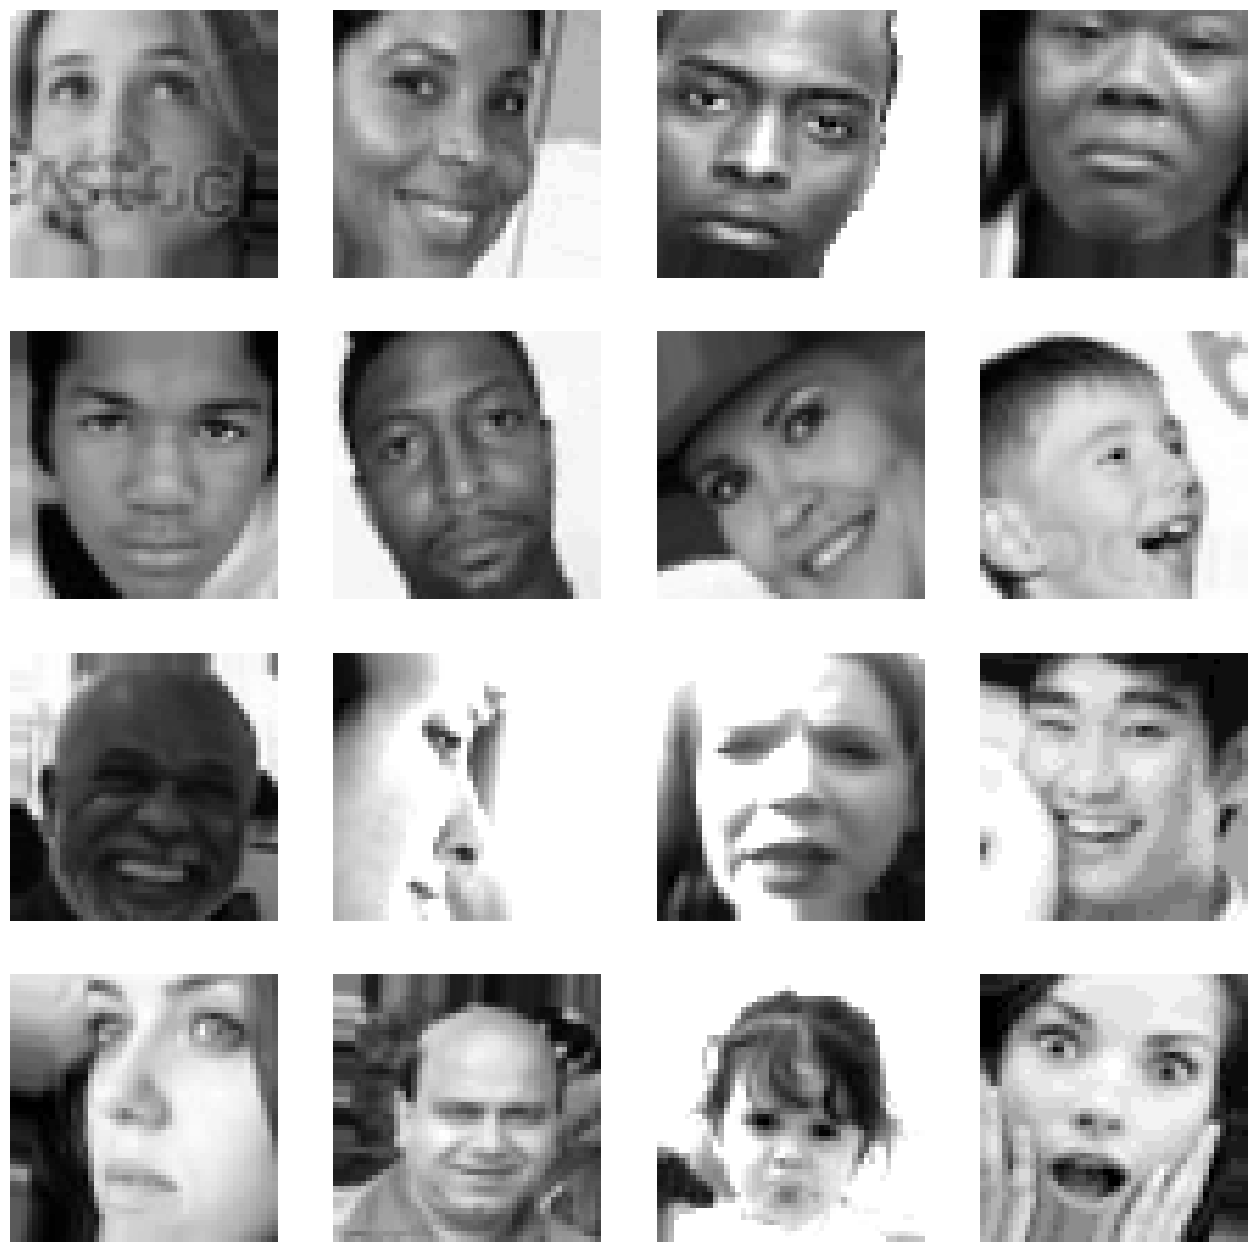

In [ ]:
images, labels = next(train_generator)
fig, axes = plt.subplots(4, 4, figsize = (16, 8))
fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):
    ax.imshow(image, cmap='gray')
    ax.axis('off')

**Observations:**

* Some faces in the images are rotated
* Some images are brightned or darkened
* Some appear to have had a 'zoom in' effect

It seems that the data generated has been effective and according to the parameters we specified.

------------------------
## **3. Model Building**
------------------------

CNNs is a better approach than ANNs because CNNs achieve **spatial and translational invariance** through the use of **convolutional layers** and **pooling layers**.

CNNs **extract important features** from the images, discarding the less important ones before flattening the spatial structure of an image whereas ANNs flattens the spatial structure at the start. CNNs, are specifically designed for feature extraction from images and other types of structured data using convolutional layers to apply filters to local regions of the input image, allowing the network to learn local features such as edges and corners.

Finally, CNNs are **computationally more efficient** than ANNs because of **parameter sharing** and **local connectivity**. Indeed, the same set of weights (or filters or kernels) is used for each location in the input image. This significantly reduces the number of parameters that need to be learned compared to ANNs, which use a separate set of weights for each input feature.









### **3.1 Creating the Base Neural Network**

### CNN Model 1 Architecture

**Feature Extraction layers**
- The first model will have three convolutional blocks.
- We shall add **first Conv2D layer with 64 filters** and a kernel size of 3x3. We shall use the 'same' padding and provide the input shape = (48, 48, 1) as we selected the single-channel. We shall use the 'relu' activation.
- We shall add a **second Conv2D layer with 32 filters** and a kernel size of 3x3. We shall use the 'same' padding and 'relu activation.
- Add a **third Conv2D layer with 32 filters** and the kernel size of 3x3. We shall use the 'same' padding and 'relu activation.

Once the convolutional blocks are added, we shall add the Flatten layer.

**Fully Connected layers**
- Finally, we shall add dense layers.
- We shall add **first Dense layer with 100 neurons** and 'relu' activation
- The last dense layer must have as many neurons as the number of classes, which in this case is 4 and use 'softmax' activation.
- We shall use the **Adam optimizer** with learning rate set to 0.001, which stands for Adaptive Moment Estimation, it is a variation of the stochastic gradient descent (SGD) optimization algorithm.

We shall compile the model using the optimizer we initialized and use **categorical_crossentropy** as the loss function and **'accuracy' as the metric**.

Finally, we shall print the model summary and write down observations/insights about the model.

#### **Fix the seed for random number generator**

First, let's set the seed for the random number generators in Numpy, Python's Random package, and TensorFlow to ensure we are able to reproduce these results every time we run the code.

In [ ]:
# clearing the session
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
np.random.seed(72)
random.seed(72)
tf.random.set_seed(72)

#### **Building and Compiling the Model**

In [ ]:
def cnn_model_1():

    # Intializing a sequential model
    model = Sequential()

    # Adding first conv layer with 64 filters and kernel size 3x3, padding 'same' provides the output size same as the input size
    # The input_shape denotes input image dimension
    model.add(Conv2D(64, (3, 3), activation = 'relu', padding = "same", input_shape = (img_size, img_size, 1)))

    # Adding second conv layer with 32 filters and kernel size 3x3, padding 'same' followed by a Maxpooling2D layer
    model.add(Conv2D(32, (3, 3), activation = 'relu', padding = "same"))

    # Add third conv layer with 32 filters and kernel size 3x3, padding 'same' followed by a Maxpooling2D layer
    model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))

    # Flattening the output of the conv layer after max pooling to make it ready for creating dense connections
    model.add(Flatten())

    # Adding a fully connected dense layer with 100 neurons
    model.add(Dense(100, activation = 'relu'))

    # Adding the output layer with 4 neurons (4 output classes) and activation functions as softmax since this is a multi-class classification problem
    model.add(Dense(4, activation = 'softmax'))

    # Using Adam Optimizer
    opt = Adam(learning_rate = 0.001)

    # Compiling the model
    model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    # Return the compiled model
    return model

In [ ]:
# Let us call the cnn_model_1 function and store the model in a variable
model_1=cnn_model_1()

# Let us print the summary of the model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        18464     
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 73728)             0         
                                                                 
 dense (Dense)               (None, 100)               7372900   
                                                                 
 dense_1 (Dense)             (None, 4)                 404       
                                                                 
Total params: 7,401,656
Trainable params: 7,401,656
Non-

**Observations:**

- As we can see from the above summary, this CNN model will train and learn **7,401,656 parameters (weights and biases).**
- There are **no non-trainable parameters** in the model.

#### **Training the Model**

We shall train our base model using two **call backs** which are functions that are called during the training process at specific points to customize the behavior of the training process of the model:

- **EarlyStopping**: monitor the validation loss during training and stop the training process early if the validation loss has stopped improving.

- **ModelCheckpoint**: save the model with the best performance on a specified metric during training, which can be useful for later evaluation or for continuing training from a specific point

In [ ]:
# Pulling a single large batch of random testing data for validation after each epoch
validation_images, validation_labels = validation_generator.next()

In [ ]:
# We shall stop the training process when the model's performance no longer improves by monitoring
# the validation loss (the lower the loss, the better so mode is minimum) over 5 epochs (patience)
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)

# We shall save the best weights and bias of our Google Drive so we can access it in case our system crashes
# and not restart the whole training from scratch, by monitoring the validation accuracy (the higher the better
# so mode is maximum) and save on only the best epoch
mc = ModelCheckpoint('/content/drive/MyDrive/MIT Applied DS/Capstone/Facial_emotion_images/best_model.h5',
                     monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

# Fitting the model with 60 epochs and batch_size = 32
# and storing the model building history to use later for visualization
history_1=model_1.fit(train_generator,
          validation_data=(validation_images, validation_labels),
          epochs = 60,
          batch_size= 32, callbacks = [es, mc])

Epoch 1/60
473/473 [==============================] - ETA: 0s - loss: 1.3525 - accuracy: 0.3172
Epoch 1: val_accuracy improved from -inf to 0.46875, saving model to /content/drive/MyDrive/MIT Applied DS/Capstone/Facial_emotion_images/best_model.h5
473/473 [==============================] - 42s 80ms/step - loss: 1.3525 - accuracy: 0.3172 - val_loss: 1.2193 - val_accuracy: 0.4688
Epoch 2/60
473/473 [==============================] - ETA: 0s - loss: 1.2987 - accuracy: 0.3797
Epoch 2: val_accuracy improved from 0.46875 to 0.50000, saving model to /content/drive/MyDrive/MIT Applied DS/Capstone/Facial_emotion_images/best_model.h5
473/473 [==============================] - 34s 72ms/step - loss: 1.2987 - accuracy: 0.3797 - val_loss: 1.1766 - val_accuracy: 0.5000
Epoch 3/60
473/473 [==============================] - ETA: 0s - loss: 1.2600 - accuracy: 0.4053
Epoch 3: val_accuracy improved from 0.50000 to 0.53125, saving model to /content/drive/MyDrive/MIT Applied DS/Capstone/Facial_emotion_image

In [ ]:
# Specify the file path
file_name = 'saved_model_1.h5'
save_file = os.path.join(save_dir, file_name)

# Save the model to the specified path
model_1.save(save_file)
print("Model saved successfully at:", save_file)

# Reload the model from the saved file
loaded_model = Sequential()
loaded_model = loaded_model.load_weights(save_file)

In [ ]:
# Saving the best final model to an HDF5 file for future use
# model_1.save('saved_model_1.h5')

In [ ]:
# Reload the model from the saved file if needed
# model_1 = Sequential()
# model_1 = model_1.load_weights('saved_model_1.h5')

**Observations:**

- The model stopped training at epoch 18, as the validation accuracy was not improving
- The learning curve on training data was slowing down from epoch 6


#### **Plotting the Training and Validation Accuracies**

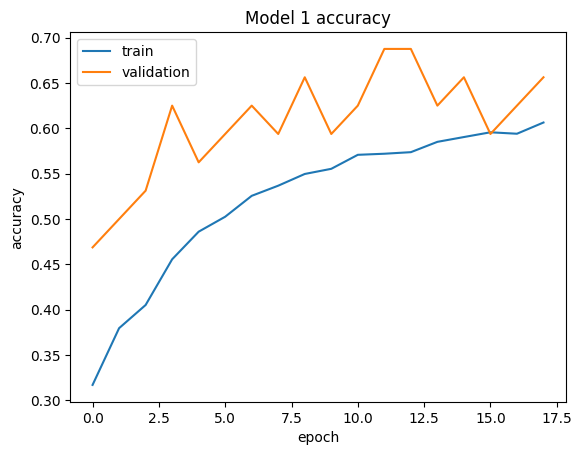

In [ ]:
# Plotting the training and validation accuracies for each epoch

plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model 1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Observations:**

- This base model is underfitting with the validation curve over the training curve
- The validation accuracy is fluctuating and is not improving after epoch 11.


#### **Evaluating the Model on the Test Set**

In [ ]:
model_1.evaluate(test_generator)


4/4 [==============================] - 0s 43ms/step - loss: 0.7887 - accuracy: 0.6484


[0.7886652946472168, 0.6484375]

**Observations and Insights:**

* The training didn't continue for all of the 60 epochs. The training stopped early at epoch 18 because the performance wasn't improving beyond a certain point.
*   We can see from the above plot that the validation **accuracy of the  model was not good (68%) and the training accuracy is worse (60%)**, which means the model is **underfitting**.
* The performance is consistent on the test data with an accuracy of 64%.
* The **color mode grayscale is giving better results from 36% to 64%**.

Let's **improve the model's performance by adding complexity** with an additional convolution layer and an additonal Dense layer. We shall not add any Dropout layers since our base model is underfitting.


### **3.2 Creating the second Convolutional Neural Network**

- Try out a slightly larger architecture

### CNN Model 2 Architecture


**Feature Extraction layers**

The second model will have four convolutional blocks.
Each convolutional block will have a Conv2D layer and a MaxPooling2D Layer.

- We shall add first **Conv2D layer with 256 filters** and a** kernel size of 4x4**. We shall use the 'same' padding and provide the input shape = (48, 48, 1) as we selected a single-color channel. We shall use 'relu' activation.
- We shall add **MaxPooling2D layer** with kernel size 2x2 and strides = (2,2).
- We shall add **BatchNormalization layer**.
- We shall add second **Conv2D layer with 128 filters** and a kernel size of 4x4. We shall use the 'same' padding and the 'relu' activation.
- We shall add **MaxPooling2D layer** with kernel size 2x2 and strides = (2,2).
- We shall add a third **Conv2D layer with 64 filters** and the kernel size of 4x4. We shall use the 'same' padding and the 'relu' activation.
- Once again, we shall follow it up with another **Maxpooling2D layer** kernel size 2x2 and strides = (2,2).
- We shall add a **fourth Conv2D layer with 32 filters**  and the kernel size of 4x4. We shall use the 'same' padding and 'relu activation.
- Once again, we shall follow it up with another **Maxpooling2D** layer kernel size 2x2 and strides = (2,2).
- We shall add **BatchNormalization layer**.

Once the convolutional blocks are added, we shall add the Flatten layer.

**Fully Connected layers**

Finally, we shall add dense layers.

- We shall use a  **first Dense layer with 64 neurons** and 'relu' activation
- We shall use **second Dense layer with 32 neurons** and 'relu' activation
- The last dense layer must have as many neurons as the number of classes, which in this case is 4 and use 'softmax' activation.
- We shall use the **Adam optimizer** with learning rate set to 0.001.

We shall compile the model using the optimizer we initialized and use **categorical_crossentropy** as the loss function and **'accuracy' as the metric**.

Finally, we shall print the model summary and write down observations/insights about the model.

In [ ]:
# clearing the session
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
np.random.seed(72)
random.seed(72)
tf.random.set_seed(72)

#### **Building and Compiling the Model**

In [ ]:
def cnn_model_2():

  # Initializing a sequential model
  model = Sequential()

  # Adding first conv layer with 256 filters and kernel size 4x4, with ReLU activation and padding 'same' provides the output size same as the input size
  # The input_shape denotes input image dimension
  model.add(Conv2D(filters = 256, kernel_size = (4, 4), padding = 'Same', activation = 'relu', input_shape = (img_size, img_size, 1)))

  # Adding max pooling to reduce the size of output of first conv layer
  model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

   # Adding BatchNormalization to stabilize inputs to the dropout layer
  model.add(BatchNormalization())

  # Adding second conv layer with 128 filters and with kernel size 4x4 and ReLu activation function
  model.add(Conv2D(filters = 128, kernel_size = (4, 4), padding = 'Same', activation = 'relu'))

  # Adding max pooling to reduce the size of output of the conv layer
  model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

  # Adding third conv layer with 64 filters and with kernel size 4x4 and ReLu activation function
  model.add(Conv2D(filters = 64, kernel_size = (4, 4), padding = 'Same', activation = 'relu'))

  # Adding max pooling to reduce the size of output of the conv layer
  model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

    # Adding fourth conv layer with 32 filters and with kernel size 4x4 and ReLu activation function
  model.add(Conv2D(filters = 32, kernel_size = (4, 4), padding = 'Same', activation = 'relu'))

  # Adding max pooling to reduce the size of output of the conv layer
  model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

  # Flattening the 3-d output of the conv layer after max pooling to make it ready for creating dense connections
  model.add(Flatten())

  # Adding first fully connected dense layer with 64 neurons
  model.add(Dense(512, activation = "relu"))

  # Adding second fully connected dense layer with 32 neurons
  model.add(Dense(256, activation = "relu"))

  # Adding the output layer with 4 neurons and activation functions as softmax since this is a multi-class classification problem
  model.add(Dense(4, activation = "softmax"))

  # Using Adam Optimizer
  opt = Adam(learning_rate = 0.001)

  # Compile the model
  model.compile(optimizer = opt , loss = "categorical_crossentropy", metrics = ["accuracy"])

  # Return the compiled model
  return model

In [ ]:
# Let us call the cnn_model_2 function and store the model in a variable
model_2=cnn_model_2()

# Let us print the summary of the model
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 256)       4352      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 256)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 256)      1024      
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       524416    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 128)      0         
 2D)                                                             
                                                        

**Observations:**

- As we can see from the above summary, this CNN model will train and learn **973,540 parameters (weights and biases).**
- There are **512 non-trainable parameters** in the model.

#### **Training Model 2**

Let's now train the model using the training data.

**Reducing the Learning Rate**:

ReduceLRonPlateau() is another call back function that will be used to decrease the learning rate by some factor if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [ ]:
# Pulling a single large batch of random testing data for validation after each epoch
validation_images, validation_labels = validation_generator.next()

In [ ]:
# Fine-tuning the hyperparameters in the callback functions
es = EarlyStopping(monitor = 'val_loss',
                   mode = 'min',
                   verbose = 1,
                   patience = 5)

mc = ModelCheckpoint('/content/drive/MyDrive/MIT Applied DS/Capstone/Facial_emotion_images/best_model2.h5',
                     monitor = 'val_accuracy',
                     mode = 'max',
                     verbose = 1,
                     save_best_only = True)

rlr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

# Fitting the model with 30 epochs, batch_size = 32
# and storing the model building history to use later for visualization
history_2=model_2.fit(train_generator,
          validation_data=(validation_images, validation_labels),
          epochs = 30,
          batch_size= 32, callbacks = [es, mc, rlr])


Epoch 1/30
473/473 [==============================] - ETA: 0s - loss: 1.2945 - accuracy: 0.3656 
Epoch 1: val_accuracy improved from -inf to 0.34375, saving model to /content/drive/MyDrive/MIT Applied DS/Capstone/Facial_emotion_images/best_model2.h5
473/473 [==============================] - 5476s 12s/step - loss: 1.2945 - accuracy: 0.3656 - val_loss: 1.2378 - val_accuracy: 0.3438 - lr: 0.0010
Epoch 2/30
473/473 [==============================] - ETA: 0s - loss: 1.2205 - accuracy: 0.4250
Epoch 2: val_accuracy improved from 0.34375 to 0.56250, saving model to /content/drive/MyDrive/MIT Applied DS/Capstone/Facial_emotion_images/best_model2.h5
473/473 [==============================] - 34s 72ms/step - loss: 1.2205 - accuracy: 0.4250 - val_loss: 0.8873 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 3/30
473/473 [==============================] - ETA: 0s - loss: 1.1640 - accuracy: 0.4644
Epoch 3: val_accuracy did not improve from 0.56250
473/473 [==============================] - 34s 71ms/step -

**Observations:**

- The model stopped training at epoch 26, as the validation accuracy was not improving
- Both the validation accuracy and training accuracy improved from the base model
- We can see that the function ReduceLROnPlateau was called two times, which improved the performance as the model continued to learn on more epochs

#### **Plotting the Training and Validation Accuracies**

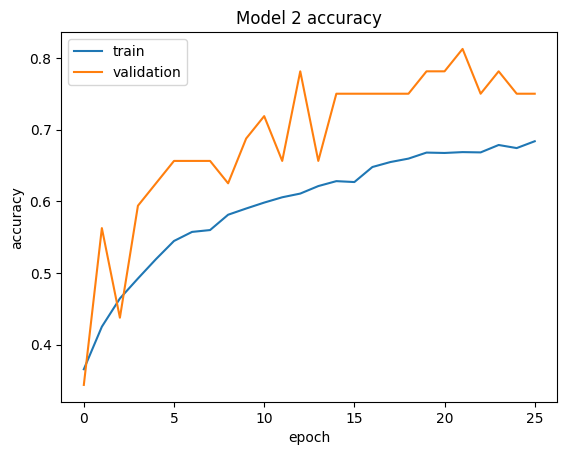

In [ ]:
# Plotting the training and validation accuracies for each epoch

plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model 2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Observations:**

- The improved CNN model is still a little  underfitting with the validation curve over the training curve
- The validation accuracy is fluctuating and is not improving after epoch 21.


#### **Evaluating the Model on the Test Set**

In [ ]:
model_2.evaluate(test_generator)


4/4 [==============================] - 42s 14s/step - loss: 0.5923 - accuracy: 0.7578


[0.5922912955284119, 0.7578125]

**Observations and Insights:**

- The training didn't continue for all of the 30 epochs. The training stopped early at epoch 27 because the performance wasn't improving beyond a certain point
- The model continued to learn on more epochs when the Learning Rate was reduced the first time.
- This model **performed reasonably well on test set**
- The performance of the model on the test set improved from 64% to 75% thanks to more complex architecture and the increase of the kernel size from 3x3 to 4x4
- The model is slightly underfitting, with a validation accuracy reaching 78% and training accuracy at 66%


* **Overall performance**

The CNN models gave a somewhat **good performance**, especially the second one. This model is still slightly underfitting but both accuracy on testing and validation have improved significantly compared to the base model.


* **Color mode and performance**

The **color mode grayscale gave better performance** both in terms of accuracy and computational time. The possible reasons are:

  - features in grayscale were better captured by the model because the contrast of the facial features is sharper

  - the training time for grayscale images is reduced so the model is able to learn more quickly what the important features are

The **color mode 'rgb' is not needed** because no information is added to the images by converting a single channel image to a three channel image. Indeed, as seen in the EDA section 2.6, although each image has 3 color channels, the RGB values in each channel are the same, so there is no added information in having 3 channels since it is the same information, repeated three times.

![picture](https://drive.google.com/uc?id=16NSx64EQBW93zwxQ0kz7HcuzRCXsPBEo)


### **3.3 Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely:
  -  VGG16,
  - ResNet v2,  
  - Efficient Net B7.

Below is a table that summarises their characteristics:

The **top-1 and top-5 accuracy** refers to the model's performance on the ImageNet validation dataset.

**Depth** refers to the topological depth of the network. This includes activation layers, batch normalization layers etc. Depth counts the number of layers with parameters.

**Time per inference step** is the average of 30 batches and 10 repetitions.

source: [Keras Applications](https://keras.io/api/applications/#usage-examples-for-image-classification-models)

![picture](https://drive.google.com/uc?id=1qA9CcjD1Wbgg3ONWYIwmt7JfkWRWPiSh)



The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In the previous CNN models, we used more Data Augmentation parameters. Now we will only keep a few since we are using Transfer Learning. We don't need to emphasize on the training of the model on our data since the **model we shall use is already pre-trained**.

We shall use the data generator function ImageDataGenerator with the following parameters:

- Rescale (1./255)
- Horizontal Flip (True)
- Shear (0.3)
- Brightness Range (0.,2.)

We shall use the data generator function flow_from_directory with the following parameters:

- Target Size (48,48)
- Color Mode ('rgb')
- Batch Size (32)
- Class Mode ('categorical')
- Shuffle (True)

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with **color_mode = 'rgb'** as this is the required format for the transfer learning architectures because these models have been trained on these type of images.

In [ ]:
batch_size  = 32
img_size = 48

# Defining the training data generator with its parameters
train_datagen = ImageDataGenerator(rescale=1./255,
                                    horizontal_flip = True,
                                    shear_range = 0.3,
                                    brightness_range = (0.,2.))

# Flowing training images in batches
train_generator = train_datagen.flow_from_directory(train_dir,
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb' ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)

# Normalising the validation dataset (no augmentation)
validation_datagen  = ImageDataGenerator(rescale = 1.0/255.)

# Flowing validation images in batches
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb' ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)
# Normalising the test dataset (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flowing test images in a batch of 128
test_generator = test_datagen.flow_from_directory(test_dir,
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb' ,
                                              batch_size = 128,
                                              class_mode = 'categorical',
                                              shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


#### **3.3.1 VGG16 Model**

We will be loading a [pre-built architecture - VGG16](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/VGG16), which was trained on the ImageNet dataset and finished runner-up in the ImageNet competition in 2014.

For training VGG16, we will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. We will remove the already-present fully-connected layers and add our own fully-connected layers for this binary classification task.

##### **Importing the VGG16 Architecture**

Now, let's instantiate the VGG16 model.

- The **VGG16 model was originally trained on images of size 224 x 224**. The **TensorFlow application allows the minimum image size of 32x32** which works for us because our images are 48x48. We shall specify the **argument input_shape to 48x48**.
- By specifying the **argument include_top=False**, we load a **network that doesn't include the classification layers at the top**, i.e., **we will use the VGG16 model only for feature extraction.**
- By specifing the **argument pooling='max'**, we choose a max pooling layer after the convolution layers which will help to reduce the dimensionality of the feature maps and extract the most important features.
- One popular pre-trained model is the **ImageNet dataset**, which consists of millions of labeled images spanning thousands of classes. The ImageNet dataset has been used to train deep convolutional neural networks  such as VGG16, ResNet50, and InceptionV3, among others. Setting weights to 'imagenet' **initializes the model weights with the pre-trained weights from ImageNet.**

In [ ]:
# clearing the session
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
np.random.seed(72)
random.seed(72)
tf.random.set_seed(72)

In [ ]:
# Instantiating the model
vgg_model = VGG16(weights = 'imagenet',

                       include_top = False,

                       input_shape = (img_size, img_size, 3), pooling = 'max')

In [ ]:
# Checking summary of the model
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

- The VGG16 model has **more than 14.7 M trainable parameters.**
- Here, **we will not train any of the layers from the VGG16 model**. We will use the pre-trained weights and biases.
- Also, we can take any layer's output from the VGG16 model as the input of our new model. Here, **we will take the output of the 5th block of the VGG16 model as the input of our new model.**

##### **Model Building**

- Import VGG16 upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
# Getting only the conv layers for transfer learning
transfer_layer = vgg_model.get_layer('block5_pool')       #until block5_pool only


In [ ]:
# Making all the layers of the VGG model non-trainable (i.e. freezing them)
vgg_model.trainable=False

In [ ]:
# Checking all the layers
for layer in vgg_model.layers:
    print(layer.name, layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False
global_max_pooling2d False


- We can see that for the layers of the VGG16 model, the **'trainable' parameter is set to False**.

In [ ]:
# Adding classification layers on top of it

# Flattening the output of the VGG16 model because it is from a convolutional layer
x = Flatten()(transfer_layer.output)

# Adding dense output layers // these are the layers we will train for our specific classification task
# using batch normalisation
x = Dense(512, activation = 'relu')(x)
x = Dense(256, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)
x = Dense(64, activation = 'relu')(x)
x = BatchNormalization()(x)

# Adding the output layer with 4 neurons and activation function softmax since this is a multi-class classification task
pred = Dense(4, activation = 'softmax')(x)

# Initializing the model
model_3 = Model(vgg_model.input, pred)

##### **Compiling and Training the VGG16 Model**

In [ ]:
# Compiling the model
model_3.compile(loss = 'categorical_crossentropy',

              optimizer = Adam(learning_rate = 0.001),

              metrics = ['accuracy'])

In [ ]:
# Let us print the summary of the model
model_3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

**Observations:**

- As we can see from the above summary, this model will train and learn **410,820 parameters (weights and biases).**
- There are **14,714,816 non-trainable parameters** in the model.

In [ ]:
# Pulling a single large batch of random testing data for validation after each epoch
validation_images, validation_labels = validation_generator.next()

In [ ]:
# Fine-tuning the hyperparameters in the callback functions
es = EarlyStopping(monitor = 'val_loss',
                   mode = 'min',
                   verbose = 1,
                   patience = 5)

mc = ModelCheckpoint('/content/drive/MyDrive/MIT Applied DS/Capstone/Facial_emotion_images/best_model3.h5',
                     monitor = 'val_accuracy',
                     mode = 'max',
                     verbose = 1,
                     save_best_only = True)

rlr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

# Fitting the model with 30 epochs, batch_size = 32
# and storing the model building history to use later for visualization
history_3=model_3.fit(train_generator,
          validation_data=(validation_images, validation_labels),
          epochs = 30,
          batch_size= 32, callbacks = [es, mc, rlr])

Epoch 1/30
473/473 [==============================] - ETA: 0s - loss: 1.2336 - accuracy: 0.4343
Epoch 1: val_accuracy improved from -inf to 0.46875, saving model to /content/drive/MyDrive/MIT Applied DS/Capstone/Facial_emotion_images/best_model3.h5
473/473 [==============================] - 39s 78ms/step - loss: 1.2336 - accuracy: 0.4343 - val_loss: 1.1696 - val_accuracy: 0.4688 - lr: 0.0010
Epoch 2/30
473/473 [==============================] - ETA: 0s - loss: 1.1746 - accuracy: 0.4667
Epoch 2: val_accuracy improved from 0.46875 to 0.56250, saving model to /content/drive/MyDrive/MIT Applied DS/Capstone/Facial_emotion_images/best_model3.h5
473/473 [==============================] - 37s 77ms/step - loss: 1.1746 - accuracy: 0.4667 - val_loss: 0.9445 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 3/30
473/473 [==============================] - ETA: 0s - loss: 1.1584 - accuracy: 0.4776
Epoch 3: val_accuracy improved from 0.56250 to 0.59375, saving model to /content/drive/MyDrive/MIT Applied DS/C

**Observations:**

- The model stopped training at epoch 25, as the validation accuracy was not improving
- Both the validation accuracy and training accuracy improving but at a very slow rate
- We can see that the function ReduceLROnPlateau was called several times, which improved the performance as the model continued to learn on more epochs

##### **Plotting the Training and Validation Accuracies**

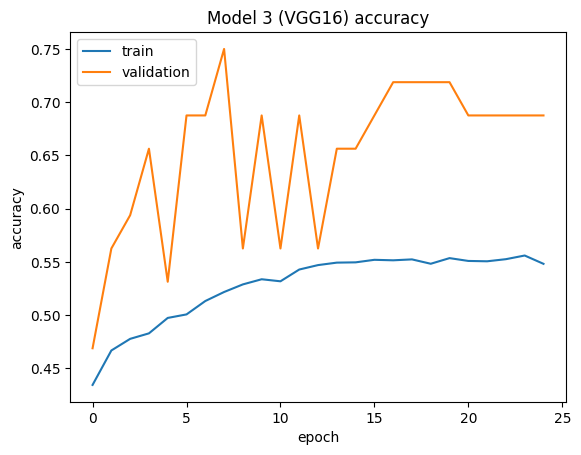

In [ ]:
# Plotting the training and validation accuracies for each epoch

plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model 3 (VGG16) accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Observations:**

- We can see our model is **highly underfitting**
- The validation accuracy is fluctuating and is not improving after epoch 20.

##### **Evaluating the VGG16 model**

In [ ]:
model_3.evaluate(test_generator)

4/4 [==============================] - 0s 43ms/step - loss: 1.0332 - accuracy: 0.5625


[1.0331648588180542, 0.5625]

**Observations and Insights:**

- The learning curve is quite flat so the model's learning curve is very slow: from around 43% to 54% on training data
- From epoch 10, the training accuracy is stabilizing so the model is not learning any more
- The validation accuracy improved from 46% to 75% but not consistently
- From epoch 20, the validation accuracy has reached a plateau
- We improved the accuracy by adding dense layers with higher number of neurons. Our best model was achieved with **4 dense layers with 512, 256, 128 and 64 neurons** respectively
- Even with increase of complexity, our model is still underfitting and its **performance on test data of 56% remains poor**

#### **3.3.2 ResNet V2 Model**

We will be loading a pre-built architecture - [ResNet V2 Model](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet_v2/ResNet101V2), which was trained on the ImageNet dataset.

ResNet101V2 is an improved version of the original ResNet architecture that was introduced in the paper "Identity Mappings in Deep Residual Networks" by Kaiming He et al. in 2016. It is a **deep convolutional neural network that is composed of 101 layers**, including convolutional layers, pooling layers, batch normalization layers, and residual blocks.


In [ ]:
# clearing the session
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
np.random.seed(72)
random.seed(72)
tf.random.set_seed(72)

In [ ]:
img_size=48

# Instantiating the model
resnet_model = ResNet101V2(weights = 'imagenet',

                       include_top = False,

                       input_shape = (img_size, img_size, 3))

In [ ]:
# Checking summary of the model
resnet_model.summary()

Model: "resnet101v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 54, 54, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 24, 24, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 26, 26, 64)   0           ['conv1_conv[0][0]']             
                                                                                        

- The ResNet V2 model has **more than 42.5 M trainable parameters** which is almost 3 times more parameters than the VGG16 model.
- Here, **we will not train any of the layers from the ResNet V2 model**. We will use the pre-trained weights and biases.
- Also, we can take any layer's output from the ResNet V2 model as the input of our new model. Here, **we will take the output of the 5th conv block of the ResNet V2 model as the input of our new model.**

##### **Model Building**

- Import Resnet v2 upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
# Getting only the conv layers for transfer learning
transfer_layer = resnet_model.get_layer('conv5_block3_out')       #until conv5_block3_out only

In [ ]:
# Making all the layers of the ResNet V2 model non-trainable (i.e. freezing them)
resnet_model.trainable=False

In [ ]:
# Adding classification layers on top of it

# Flattening the output of the ResNet V2 model because it is from a convolutional layer
x = Flatten()(transfer_layer.output)

# Adding dense output layers // these are the layers we will train for our specific classification task
# using batch normalisation
x = Dense(512, activation = 'relu')(x)
x = Dense(256, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)
x = Dense(64, activation = 'relu')(x)
x = BatchNormalization()(x)

# Adding the output layer with 4 neurons and activation function softmax since this is a multi-class classification task
pred = Dense(4, activation = 'softmax')(x)

# Initializing the model
model_4 = Model(resnet_model.input, pred)

##### **Compiling and Training the Model**

In [ ]:
# Compiling the model
model_4.compile(loss = 'categorical_crossentropy',

              optimizer = Adam(learning_rate = 0.001),

              metrics = ['accuracy'])

In [ ]:
# Let us print the summary of the model
model_4.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 54, 54, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 24, 24, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 26, 26, 64)   0           ['conv1_conv[0][0]']             
                                                                                            

**Observations:**

- As we can see from the above summary, this model will train and learn **4,367,684 parameters (weights and biases).**
- There are **42,618,496 non-trainable parameters** in the model.

In [ ]:
# Pulling a single large batch of random testing data for validation after each epoch
validation_images, validation_labels = validation_generator.next()

In [ ]:
# Fine-tuning the hyperparameters in the callback functions
es = EarlyStopping(monitor = 'val_loss',
                   mode = 'min',
                   verbose = 1,
                   patience = 5)

mc = ModelCheckpoint('/content/drive/MyDrive/MIT Applied DS/Capstone/Facial_emotion_images/best_model4.h5',
                     monitor = 'val_accuracy',
                     mode = 'max',
                     verbose = 1,
                     save_best_only = True)

rlr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

# Fitting the model with 30 epochs, batch_size = 32
# and storing the model building history to use later for visualization
history_4=model_4.fit(train_generator,
          validation_data=(validation_images, validation_labels),
          epochs = 30,
          batch_size= 32, callbacks = [es, mc, rlr])

Epoch 1/30
473/473 [==============================] - ETA: 0s - loss: 1.1493 - accuracy: 0.4921
Epoch 1: val_accuracy improved from -inf to 0.37500, saving model to /content/drive/MyDrive/MIT Applied DS/Capstone/Facial_emotion_images/best_model4.h5
473/473 [==============================] - 48s 84ms/step - loss: 1.1493 - accuracy: 0.4921 - val_loss: 2.1754 - val_accuracy: 0.3750 - lr: 0.0010
Epoch 2/30
473/473 [==============================] - ETA: 0s - loss: 1.0724 - accuracy: 0.5380
Epoch 2: val_accuracy improved from 0.37500 to 0.46875, saving model to /content/drive/MyDrive/MIT Applied DS/Capstone/Facial_emotion_images/best_model4.h5
473/473 [==============================] - 39s 82ms/step - loss: 1.0724 - accuracy: 0.5380 - val_loss: 1.7778 - val_accuracy: 0.4688 - lr: 0.0010
Epoch 3/30
473/473 [==============================] - ETA: 0s - loss: 1.0418 - accuracy: 0.5548
Epoch 3: val_accuracy improved from 0.46875 to 0.53125, saving model to /content/drive/MyDrive/MIT Applied DS/C

**Observations:**

- The model stopped training at epoch 23, as the validation accuracy was not improving
- Both the validation accuracy and training accuracy are improving but at a slow rate
- The function ReduceLROnPlateau was called twice but that did not improve the performance as the validation accuracy still remained the same

##### **Plotting the Training and Validation Accuracies**

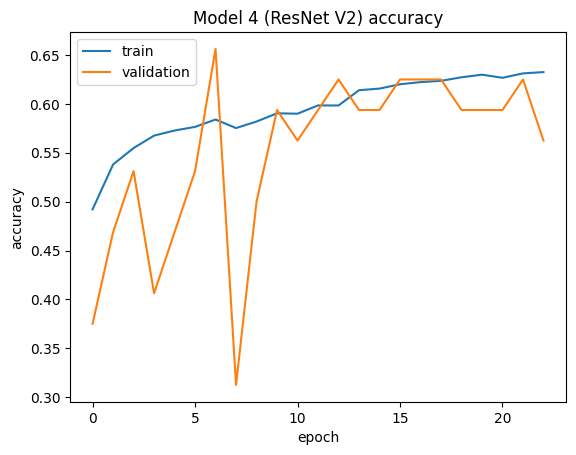

In [ ]:
# Plotting the training and validation accuracies for each epoch

plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('Model 4 (ResNet V2) accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Observations:**

- Although the validation accuracy is fluctuating, the curve is now following the training curve after epoch 10
- Both the training and validation accuracies are improving at a slow rate

##### **Evaluating the ResNet Model**

In [ ]:
model_4.evaluate(test_generator)

4/4 [==============================] - 2s 45ms/step - loss: 0.7968 - accuracy: 0.6094


[0.7968465089797974, 0.609375]

**Observations and Insights:**

- The training curve is quite flat so the model's learning curve is very slow: from around 49% to 63% on training data, which is slightly better than the model using VGG pre-built model
- The validation accuracy improved from 37% to 65% but but stopped improving at epoch 8, even though
- We improved the accuracy by adding dense layers with higher number of neurons. Our best model was achieved with **4 dense layers with 512, 256, 128 and 64 neurons** respectively
- We also tried different optimmizers such as Adamax and different learning rates such as 0.0001 but there was no significant improvement
- We also tried a different a higher batch size when fitting the model, but the performance was worse
- The **performance on test data of 60% remains poor, although better than the model using VGG pre-built model** however this model is more computationally expensive


**Note: You can even go back and build your own architecture on top of the ResNet Transfer layer and see if you can improve the performance.**

#### **3.3.3 EfficientNet Model**

We will be loading a pre-built architecture - [EfficientNetB7 Model](https://www.tensorflow.org/api_docs/python/tf/keras/applications/efficientnet/EfficientNetB7), which was trained on the ImageNet dataset.

**EfficientNet** uses a technique called compound coefficient to scale up models in a simple but effective manner. Instead of randomly scaling up width, depth or resolution, compound scaling uniformly scales each dimension with a certain fixed set of scaling coefficients. Using the scaling method and AutoML, the authors of efficient developed seven models of various dimensions, which surpassed the state-of-the-art accuracy of most convolutional neural networks, and with much better efficiency.

Source: [Understanding EfficientNet: The most powerful CNN architecture](https://medium.com/mlearning-ai/understanding-efficientnet-the-most-powerful-cnn-architecture-eaeb40386fad#:~:text=The%20biggest%20EfficientNet%20model%20EfficientNet,the%20previous%20best%20CNN%20model)



In [ ]:
# clearing the session
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
np.random.seed(72)
random.seed(72)
tf.random.set_seed(72)

In [ ]:
img_size=48

# Instantiating the model
efficientnet_model = EfficientNetB7(weights = 'imagenet',

                       include_top = False,

                       input_shape = (img_size, img_size, 3))

In [ ]:
# Checking summary of the model
efficientnet_model.summary()

Model: "efficientnetb7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 rescaling (Rescaling)          (None, 48, 48, 3)    0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 48, 48, 3)    7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)        (None, 48, 48, 3)    0           ['normalization[0][0]']          
                                                                                     

- The EfficientNet B07 model has **more than 63 M trainable parameters** which is more than 4 times more parameters than the VGG16 model.
- Here, **we will not train any of the layers from the EfficientNet B07 model**. We will use the pre-trained weights and biases.
- Also, we can take any layer's output from the EfficientNet B07 model as the input of our new model. Here, **we will take the output of the block 5J of the EfficientNet B07 model as the input of our new model.**

##### **Model Building**

- Import EfficientNet upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
# Getting only the conv layers for transfer learning
transfer_layer = efficientnet_model.get_layer('block5j_add')       #until block5j_add only

In [ ]:
# Making all the layers of the ResNet V2 model non-trainable (i.e. freezing them)
efficientnet_model.trainable=False

In [ ]:
# Adding classification layers on top of it

# Flattening the output of the EfficientNet model because it is from a convolutional layer
x = Flatten()(transfer_layer.output)

# Adding dense output layers // these are the layers we will train for our specific classification task
# using batch normalisation

x = Dense(512, activation = 'relu')(x)
x = Dense(256, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)
x = Dense(64, activation = 'relu')(x)
x = BatchNormalization()(x)

# Adding the output layer with 4 neurons and activation function softmax since this is a multi-class classification task
pred = Dense(4, activation = 'softmax')(x)

# Initializing the model
model_5 = Model(efficientnet_model.input, pred)

##### **Compiling and Training the Model**

In [ ]:
# Compiling the model
model_5.compile(loss = 'categorical_crossentropy',

              optimizer = Adam(learning_rate = 0.001),

              metrics = ['accuracy'])

In [ ]:
# Let us print the summary of the model
model_5.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 rescaling (Rescaling)          (None, 48, 48, 3)    0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 48, 48, 3)    7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)        (None, 48, 48, 3)    0           ['normalization[0][0]']          
                                                                                              

**Observations:**

- As we can see from the above summary, this model will train and learn **1,205,572 parameters (weights and biases).**
- There are **12,439,199 non-trainable parameters** in the model.

In [ ]:
# Pulling a single large batch of random testing data for testing after each epoch
validation_images, validation_labels = validation_generator.next()

In [ ]:
# Fine-tuning the hyperparameters in the callback functions
es = EarlyStopping(monitor = 'val_loss',
                   mode = 'min',
                   verbose = 1,
                   patience = 5)

# saving a file creates an error so let't not use ModelCheckpoint for now
'''mc = ModelCheckpoint('/content/drive/MyDrive/MIT Applied DS/Capstone/Facial_emotion_images/best_model5.h5',
                     monitor = 'val_accuracy',
                     mode = 'max',
                     verbose = 1,
                     save_best_only = True)'''

rlr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

# Fitting the model with 30 epochs, batch_size = 64
# and storing the model building history to use later for visualization
history_5=model_5.fit(train_generator,
          validation_data=(validation_images, validation_labels),
          epochs = 30,
          batch_size= 64, callbacks = [es, rlr])


Epoch 1/30
473/473 [==============================] - 36s 76ms/step - loss: 1.2883 - accuracy: 0.3875 - val_loss: 1.3051 - val_accuracy: 0.4375 - lr: 8.0000e-06
Epoch 2/30
473/473 [==============================] - 36s 76ms/step - loss: 1.2853 - accuracy: 0.3914 - val_loss: 1.3335 - val_accuracy: 0.3750 - lr: 8.0000e-06
Epoch 3/30
473/473 [==============================] - 36s 75ms/step - loss: 1.2885 - accuracy: 0.3836 - val_loss: 1.3044 - val_accuracy: 0.3438 - lr: 8.0000e-06
Epoch 4/30
473/473 [==============================] - 35s 75ms/step - loss: 1.2908 - accuracy: 0.3847 - val_loss: 1.3008 - val_accuracy: 0.4688 - lr: 8.0000e-06
Epoch 5/30
473/473 [==============================] - 36s 75ms/step - loss: 1.2888 - accuracy: 0.3901 - val_loss: 1.2635 - val_accuracy: 0.4062 - lr: 8.0000e-06
Epoch 6/30
473/473 [==============================] - 36s 76ms/step - loss: 1.2882 - accuracy: 0.3851 - val_loss: 1.3265 - val_accuracy: 0.3438 - lr: 8.0000e-06
Epoch 7/30
473/473 [==============

**Observations:**

- The model stopped training at epoch 10, as the validation accuracy was not improving
- The training accuracy is not improving, it is quite stable across the 10 epochs
- similarly, the validation accuracy is not improving either and fluctuates a lot around 40%
- The function ReduceLROnPlateau was called once and the model did improve it's validation accuracy from 34 to 43% but the validation was already oscillating between the two levels so we cannot determine whether the reduced learning rate had an impact

##### **Plotting the Training and Validation Accuracies**

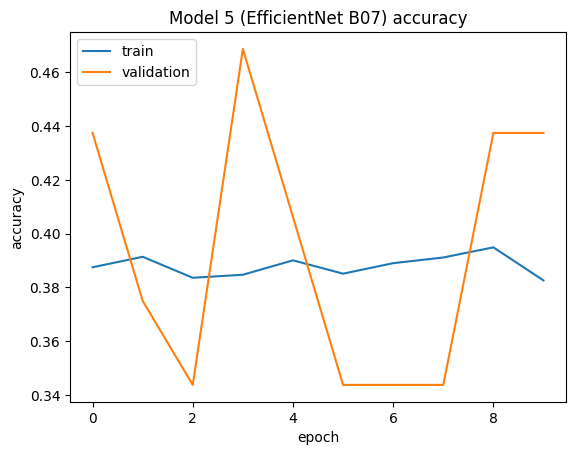

In [ ]:
# Plotting the training and validation accuracies for each epoch

plt.plot(history_5.history['accuracy'])
plt.plot(history_5.history['val_accuracy'])
plt.title('Model 5 (EfficientNet B07) accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Observations:**

- the model is not learning as we can see that the training accuracy is almost flat
- the validation accuracy is fluctuating around 40% across the epochs, so the model is not performing poorly on training and validation data


##### **Evaluating the EfficientnetNet Model**

In [ ]:
model_5.evaluate(test_generator)

4/4 [==============================] - 0s 45ms/step - loss: 1.2906 - accuracy: 0.5000


[1.2906231880187988, 0.5]

**Observations and Insights:**

- The training curve is almost flat so the model **is not learning at all**
- the validation accuracy fluctuates a lot around 40%
- we improved the accuracy on test data from 36% to 50% by using a batch size = 64 when fitting the model
- the **performance on test data of 50% remains poor** and is as not as good as the models using VGG16 model and ResNet V2 however this model seems to be less computationally expensive with the same number of dense layers added as in the other models


####**Overall performance and comparison of the Transfer Model's performances**

The overall performance of these models is poor, especially when we look at the their top-1 and top-5 accuracy performance on the ImageNet validation dataset (see table in section 3.3). Furthermore, we expected a better performance compared to our CNN models but this was not the case.
In the figure below, we summarised the performance of each model we trained using Transfer Learning architecture.

Even the best performing Transfer Learning model, using the **ResNet V2** pre-built model with over 42 million trainable parameters, yields a performance of 60%, which remains lower than the performance of the CNN models.

The **VGG16** model with more than 14.7 M trainable parameters stopped learning at epoch 10 and reached 56% accuracy, after adding dense layers with higher number of neurons.

The **EfficientNet B07** model with more than 63 M trainable parameters, which is more than 4 times more parameters than the VGG16 model, had the lowest accuracy among the three models: 50%, however this model seemed to be less computationally expensive.

The computation time indicated in the table below needs to be taken with caution as the number of epochs for training differed for each model. **Further analysis is needed to compare their computation time**.

![picture](https://drive.google.com/uc?id=19TT-oFwYc33NwEhWcJXi3KbIRTBzC3Xs)


**Issue with the 'rgb' color_mode**

One of the reasons for the poor performance could be that these deep learning models were pre-trained on a large dataset of color images and learned to **extract features from the color channels** of the images.


**Issue with the size of the images**


Another reason could be that the size our images is 48x48, which is relatively small compared to the images these models were trained on. For example, VGG16 was originally trained on the ImageNet dataset, which contains images of size 224x224 pixels. Similarly, EfficientNet B07 was trained on the ImageNet dataset with images of size 600x600 pixels. **These models were trained on high-resolution images** so may not be able to extract enough relevant features on small images since their weights were optimised for larger images.

**The performance of these Transfer Model learnings is not satisfactory.**

Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

### **3.4 Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models.

### **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale' and test with both grayscale and RGB mode.

In [ ]:
batch_size  = 32
img_size = 48

# Defining the training data generator with its parameters
train_datagen = ImageDataGenerator(rescale=1./255,
                                    horizontal_flip = True,
                                    shear_range = 0.3,
                                    brightness_range=(0.,2.))

# Flowing training images in batches
train_generator = train_datagen.flow_from_directory(train_dir,
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale' ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)

# Normalising the validation dataset (no augmentation)
validation_datagen  = ImageDataGenerator(rescale = 1.0/255.)

# Flowing validation images in batches
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale' ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)
# Normalising the test dataset (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flowing test images in batches
test_generator = test_datagen.flow_from_directory(test_dir,
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale' ,
                                              batch_size = 128,
                                              class_mode = 'categorical',
                                              shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


##### **Model Building and Compiling**

- Try building a layer with 5 Convolutional Blocks and see if the performance increases.


**Feature Extraction layers**

Each convolutional block will have a Conv2D layer and a MaxPooling2D Layer.

- We shall add **first Conv2D layer with 512 filters and a kernel size of 4x4**. We shall use the 'same' padding and provide the input shape = (48, 48, 1) as we selected a single-color channel. We shall use 'relu' activation.
- We shall add **MaxPooling2D** layer with kernel size 2x2 and strides = (2,2).
- We shall add a **DropOut** layer that will turn off 20% of the neurons
- We shall add **BatchNormalization** layer.
- We shall add **second Conv2D layer with 256 filters and a kernel size of 4x4**. We shall use the 'same' padding and the 'relu' activation.
- We shall add **MaxPooling2D** layer with kernel size 2x2 and strides = (2,2).
- We shall add **BatchNormalization** layer.
- We shall add a **third Conv2D layer with 128 filters and the kernel size of 4x4**. We shall use the 'same' padding and the 'relu' activation.
- Once again, we shall follow it up with another **Maxpooling2D** layer kernel size 2x2 and strides = (2,2).
- We shall add a **fourth Conv2D layer with 64 filters and the kernel size of 4x4**. We shall use the 'same' padding and 'relu activation.
- Once again, we shall follow it up with another **Maxpooling2D** layer kernel size 2x2 and strides = (2,2).
- We shall add a **fifth Conv2D layer with 32 filters and the kernel size of 4x4**. We shall use the 'same' padding and 'relu activation.
- Once again, we shall follow it up with another **Maxpooling2D** layer kernel size 2x2 and strides = (2,2).

Once the convolutional blocks are added, we shall add the Flatten layer.

**Fully Connected layers**

Finally, we shall add dense layers.

- We shall use a first **Dense layer with 512 neurons** and 'relu' activation
- We shall use second **Dense layer with 256 neurons** and 'relu' activation
- We shall add **BatchNormalization** layer.

The last dense layer must have as many neurons as the number of classes, which in this case is 4 and use 'softmax' activation.

We shall use the **Adam optimizer with learning rate set to 0.001**.


We shall compile the model using the optimizer we initialized and use **categorical_crossentropy** as the loss function and '**accuracy**' as the metric.

Finally, we shall print the model summary and write down observations/insights about the model.

In [ ]:
# clearing the session
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
np.random.seed(72)
random.seed(72)
tf.random.set_seed(72)

In [ ]:
def cnn_model_3():

  # Initializing a sequential model
  model = Sequential()

  # Adding first conv layer with 512 filters and kernel size 4x4, with ReLU activation and padding 'same' provides the output size same as the input size
  # The input_shape denotes input image dimension
  model.add(Conv2D(filters = 512, kernel_size = (4, 4), padding = 'Same', activation = 'relu', input_shape = (img_size, img_size, 1)))

  # Adding max pooling to reduce the size of output of first conv layer
  model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

  # Adding dropout to randomly switch off 20% neurons to reduce overfitting
  model.add(Dropout(0.2))

   # Adding BatchNormalization to stabilize inputs
  model.add(BatchNormalization())

  # Adding second conv layer with 256 filters and with kernel size 4x4 and ReLu activation function
  model.add(Conv2D(filters = 256, kernel_size = (4, 4), padding = 'Same', activation = 'relu'))

  # Adding max pooling to reduce the size of output of the conv layer
  model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

  # Adding BatchNormalization to stabilize inputs
  model.add(BatchNormalization())

  # Adding third conv layer with 128 filters and with kernel size 4x4 and ReLu activation function
  model.add(Conv2D(filters = 128, kernel_size = (4, 4), padding = 'Same', activation = 'relu'))

  # Adding max pooling to reduce the size of output of the conv layer
  model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

  # Adding fourth conv layer with 64 filters and with kernel size 4x4 and ReLu activation function
  model.add(Conv2D(filters = 64, kernel_size = (4, 4), padding = 'Same', activation = 'relu'))

  # Adding max pooling to reduce the size of output of the conv layer
  model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

  # Adding fifth conv layer with 32 filters and with kernel size 4x4 and ReLu activation function
  model.add(Conv2D(filters = 32, kernel_size = (4, 4), padding = 'Same', activation = 'relu'))

  # Adding max pooling to reduce the size of output of the conv layer
  model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

  # Flattening the 3-d output of the conv layer after max pooling to make it ready for creating dense connections
  model.add(Flatten())

  # Adding first fully connected dense layer with 512 neurons
  model.add(Dense(512, activation = 'relu'))

  # Adding second fully connected dense layer with 256 neurons
  model.add(Dense(256, activation = 'relu'))

  # Adding BatchNormalization to stabilize inputs
  model.add(BatchNormalization())

  # Adding the output layer with 4 neurons and activation functions as softmax since this is a multi-class classification problem
  model.add(Dense(4, activation = "softmax"))

  # Using Adam Optimizer
  opt = Adamax(learning_rate = 0.001)

  # Compile the model
  model.compile(optimizer = opt , loss = "categorical_crossentropy", metrics = ["accuracy"])

  # Return the compiled model
  return model

In [ ]:
# Let us call the cnn_model_3 function and store the model in a variable
model_6=cnn_model_3()

# Let us print the summary of the model
model_6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 512)       8704      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 512)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 512)       0         
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 512)      2048      
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 256)       2097408   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 256)      0

**Observations:**

- As we can see from the above summary, this Complex Neural Network model will train and learn **2,945,764 parameters (weights and biases).**
- There are **2,048 non-trainable parameters** in the model.

##### **Training the Model**

In [ ]:
# Pulling a single large batch of random testing data for validation after each epoch
validation_images, validation_labels = validation_generator.next()

In [ ]:
# Fine-tuning the hyperparameters in the callback functions
es = EarlyStopping(monitor = 'val_loss',
                   mode = 'min',
                   verbose = 1,
                   patience = 5)

mc = ModelCheckpoint('/content/drive/MyDrive/MIT Applied DS/Capstone/Facial_emotion_images/best_model6.h5',
                     monitor = 'val_accuracy',
                     mode = 'max',
                     verbose = 1,
                     save_best_only = True)

rlr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

# Fitting the model with 30 epochs, batch_size = 64
# and storing the model building history to use later for visualization
history_6=model_6.fit(train_generator,
          validation_data=(validation_images, validation_labels),
          epochs = 30,
          batch_size= 64, callbacks = [es, mc, rlr])

Epoch 1/30
473/473 [==============================] - ETA: 0s - loss: 1.3685 - accuracy: 0.3140
Epoch 1: val_accuracy improved from -inf to 0.53125, saving model to /content/drive/MyDrive/MIT Applied DS/Capstone/Facial_emotion_images/best_model6.h5
473/473 [==============================] - 39s 68ms/step - loss: 1.3685 - accuracy: 0.3140 - val_loss: 1.2351 - val_accuracy: 0.5312 - lr: 0.0010
Epoch 2/30
473/473 [==============================] - ETA: 0s - loss: 1.1861 - accuracy: 0.4610
Epoch 2: val_accuracy did not improve from 0.53125
473/473 [==============================] - 30s 64ms/step - loss: 1.1861 - accuracy: 0.4610 - val_loss: 0.9697 - val_accuracy: 0.5312 - lr: 0.0010
Epoch 3/30
473/473 [==============================] - ETA: 0s - loss: 1.0243 - accuracy: 0.5536
Epoch 3: val_accuracy did not improve from 0.53125
473/473 [==============================] - 30s 64ms/step - loss: 1.0243 - accuracy: 0.5536 - val_loss: 1.1973 - val_accuracy: 0.5312 - lr: 0.0010
Epoch 4/30
473/473 

**Observations:**

- The model stopped training at epoch 13, as the validation accuracy was not improving
- Both the validation accuracy and training accuracy improved
- We can see that the function ReduceLROnPlateau was called once, but this did not improve the validation accuracy

##### **Plotting the Training and Validation Accuracies**

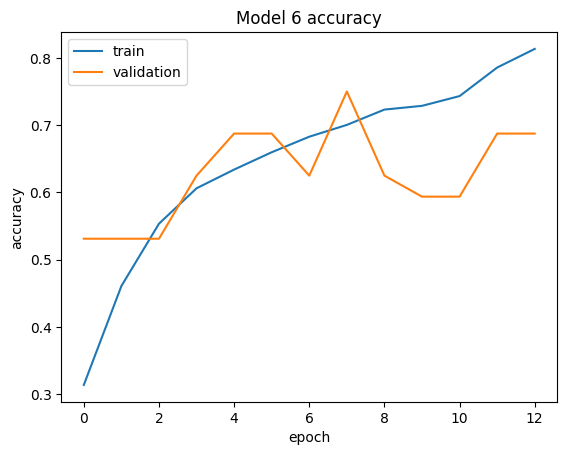

In [ ]:
# Plotting the training and validation accuracies for each epoch

plt.plot(history_6.history['accuracy'])
plt.plot(history_6.history['val_accuracy'])
plt.title('Model 6 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Observations:**

- The training accuracy is consistently improving which means that the model is learning well
- The validation accuracy is fluctuating slightly and follows the training cruve which means it is learning well
- The model may be slighly overfitting but overall but the gap is not significant

##### **Evaluating the Model on Test Set**

In [ ]:
model_6.evaluate(test_generator)

1/1 [==============================] - 2s 2s/step - loss: 0.5144 - accuracy: 0.8281


[0.5143805742263794, 0.828125]

**Observations and Insights:**

- The training didn't continue for all of the 30 epochs. The training stopped early at epoch 13 because the performance wasn't improving beyond a certain point
- This model **performed quite well on test set**, improving from 75% to 82% compared to the second CNN model we built by changing the batch size to 64.
- We also tried changing the activation function to 'LeakyReLU' but the accuracy on test data dropped to 75%.
- We **resolved the underfitting problem** we had with our two previous CNN models and now our model is generalising well.
- The color mode grayscale gave better performance both in terms of accuracy and computational time. **We improved the performance of our Complex CNN model from 74% (RGB) to 82% (grayscale)**.
- The number of parameters trained in this model (around 3M) is comparable to the number of parameters trained in the models using Transfer Learning architecture, but our model performed significantly better in learning the important features that will solve the classification problem.
- Furthermore, the computation time our model used is also comparable to the models using Transfer Learning architecture.
- Building a Complex CNN has proven beneficial because we could use the color mode grayscale which was more relevant to our task to increase the learning and performance of our model. Indeed, **it is advantageous to have an architecture as large as the Transfer Learning Architrectures while still being able to use the grayscale color mode**.
- This model is therefore our chosen final model.

##### **Plotting the Confusion Matrix for the chosen final model**

In [ ]:
# Pulling a single large batch of random testing data for validation after each epoch
test_images, test_labels = test_generator.next()

# Predicting using our final model, model 6
pred = model_6.predict(test_images)

# Converting probabilities to class labels
pred = np.argmax(pred, axis = 1)
y_true = np.argmax(test_labels, axis = 1)


4/4 [==============================] - 0s 18ms/step


              precision    recall  f1-score   support

           0       0.82      0.88      0.85        32
           1       0.86      0.78      0.82        32
           2       0.71      0.75      0.73        32
           3       0.94      0.91      0.92        32

    accuracy                           0.83       128
   macro avg       0.83      0.83      0.83       128
weighted avg       0.83      0.83      0.83       128



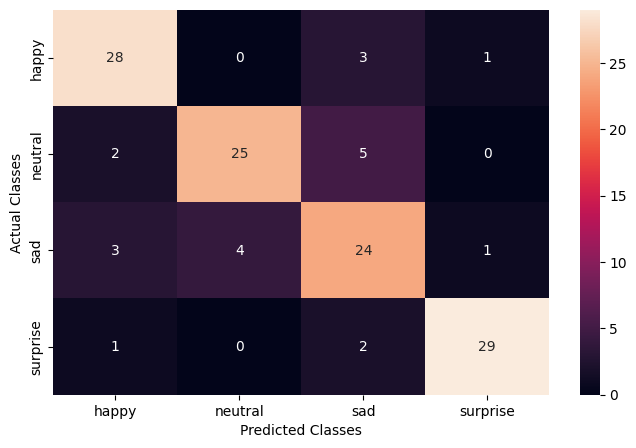

In [ ]:
# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = categories, yticklabels = categories)
plt.ylabel('Actual Classes')
plt.xlabel('Predicted Classes')
plt.show()

**Observations and Insights:**

- The recall ranges from 75% to 91% which implies that the model is good at identifying the emotions 'happy' and 'surprise' while not as good at identifying the emotions 'sad' and 'neutral. For example, the model can identify 91% of 'surprise' emotions but can identify only 75% of the 'sad' emotion.
- The 'surprise' and 'happy' classes have the highest recall scores with respectively 91% and 88%
  - out of the 32 images in 'surprise', 2 were misclassified as 'sad' and 1 was misclassified as 'happy'
  - out of the 32 images in 'happy', 3 were misclassified as 'sad' and 1 was misclassified as 'surprise'
- The 'neutral' and 'sad' classes have the lowest recall score with respectively 78% and 75%:
  - out of the 32 images in 'neutral', 5 were misclassified as 'sad' and 2 as 'happy'
  - out of the 32 images in 'sad', 4 were misclassified as 'neutral' and 3 were misclassified as 'happy'

- We observe that the model does not confuse 'surprise' and 'neutral'.

Let's gain some insight on the misclassifications by viewing some predicted images and their labels.

##### **Visualising the predicted images**

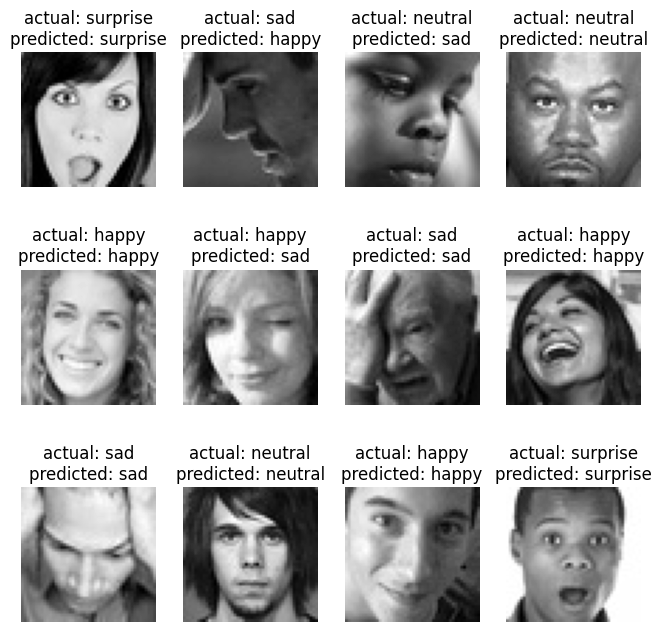

In [ ]:
rows = 3

cols = 4

fig = plt.figure(figsize = (8, 8))

for i in range(cols):

    for j in range(rows):

        random_index = np.random.randint(0, len(y_true))

        ax = fig.add_subplot(rows, cols, i * rows + j + 1)

        ax.imshow(test_images[random_index, :], cmap='gray')

        pred_label = categories[pred[random_index]]

        true_label = categories[y_true[random_index]]

        ax.set_title("actual: {}\npredicted: {}".format(true_label, pred_label))

        plt.axis('off')


plt.show()

**Observations:**

- By visualizing the predicted images and their labels, we can gain further insight on the misclassifications:
  - one image is an image with text (see Figure (h) below)
  - two misclassified images have subjects that are showing a profile (Figure (e)) or a 1/4 profile (Figure (d))
  - one subject is winking (Figure (c)) so has one eye closed
  - one subject is wearing opaque sun glasses hiding his eyes completely
- The model has limitations in distinguishing the right emotions when even the human eye can confuse: Figures (d) and (g)
- The model has limitations in distinguishing the emotion when the face is partially covered, under shadow or distorted so has fewer visible features: Figures (d), (e), (f) and (g)


![picture](https://drive.google.com/uc?id=1jTGL49GZXmCw02gGylVNchsHRlIDaCUv)

### **Conclusion**

We built a Complex CNN model because our Transfer Learning models were not performing well and our first CNN models performed reasonably well.

We overcame the **limitation of the RGB color mode** we had with our Transfer Learning models because our images in our dataset are grayscale. Our Complex CNN model performed better on color mode grayscale (82%) than on RGB mode (74%).

Furthermore, our Complex CNN model is **computationnally more efficient** than the two CNN models and the Transfer Learning Learning models even with similar number of trainable paramaters than the Learning Learning models, which is a significant advantage if we want to deploy this model in production.

Finally, based on our analysis of the classification report and confusion matrix, our **model is good at identifying the emotions 'happy' and 'surprise' while not as good at identifying the emotions 'sad' and 'neutral'**. For example, the model can identify 91% of 'surprise' emotions but can identify only 75% of the sad emotion. However, our model does not confuse 'surprise' and 'neutral'.


When visualising a selection of misclassified images, we can see that our model **has limitations in distinguishing the correct emotion when the face is partially covered**, so has fewer visible features.

At this stage, **the model performance may need further improvement before being deployed in production**. If we had to use this model in the mental healthcare sector for example, and had to rely on our model to predict whether a patient is sad using facial expressions only, there is a 25% chance that the model makes a wrong prediction which could lead to a wrong conclusion regarding treatment.



### **Insights**

**Imbalance of classes in the target variable**<br/>
There is a slight imbalance in the classes with the 'surprise' class having less images than the 3 other classes. The performance of our model was not impacted since that class had actually one of the highest recall score (91%) and f1-score (92%). If we had seen a poor performance in predicting this class, we could have used two techniques to overcome the imbalance:
  - working on the data by oversampling of that class
  - working on the model by using class weights when fitting the model

**Data Augmentation**<br/>
We tried various parameters to augment the data while training our models and this improved the performance of our base model (with no data augmentation). This could perhaps explain why our models seemed to be underfitting in the beginning of the modeling process with better performance on validation.

**Transfer Learning**<br/>
In theory using Transfer Learning models is a good idea because of by reusing these pre-trained models, we can benefit from their optimized feature extraction capabilities and improve the performance of our model on the new image classification task. However our dataset is composed of only grayscale small images while these pre-trained models have been trained on high resolution images with 3 color channels. Therefore, to solve our specific task, using Transfer Learning models did prove to be beneficial.

**Distinct features we observed for each class**<br/>
We identified disctinct features for each class and noted that the eyes play an important role. When visualising the misclassified images, we observe that when one or two eyes are covered by opaque shades, by a shadow or is closed (wink) the model cannot predict the emotion accurately.

**Preprocessing data**<br/>
When visualising randomly selected images, we noted that some images contained text on top of the face image and one image in the test dataset does not contain a face just some text. Perhaps we could work on more on the preprocessing data phase including data cleansing.

**Creating more data**<br/>
In addition to Data Augmentation on existing data, we could explore creating new data to add in the training dataset so that the model can learn on for example:
  - more subtle variations of emotions
  - different poses
  - partially covered faces (facial occlusion)


-----------------------------------
## **4. Comparison and Evaluation**
-----------------------------------

### **Comparison of various techniques**

We have noted the performance metrics and computation time of each one of our models in the table below.

![picture](https://drive.google.com/uc?id=1PRQ6uIyywu521pu1YIH6T88r4QC5eqBF)





Let us plot these results to visualise and compare the metrics.

###**Performance in terms of accuracy**

In [ ]:
# Let's create a dictionary to store all the results

data = {
    'Model': ['CNN1(g)', 'CNN2(g)', 'VGG16(rgb)', 'ResNet(rgb)', 'EfficientNet(rgb)', 'Complex CNN(g)'],
    'Training Accuracy': [0.60, 0.68, 0.54, 0.63, 0.38, 0.81],
    'Validation Accuracy': [0.68, 0.81, 0.75, 0.65, 0.43, 0.75],
    'Test Accuracy': [0.64, 0.75, 0.56, 0.60, 0.50, 0.82],
    'Computation Time': [16, 11, 14, 6, 8, 10]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

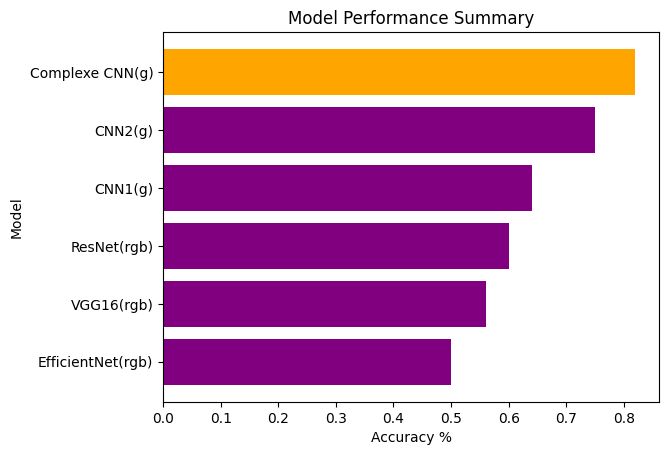

In [ ]:
import matplotlib.pyplot as plt

# Sort the dataframe by test accuracy in descending order
df1 = df.sort_values(by='Test Accuracy', ascending=True)

# Assign the color purple to all bars except for Model 6
colors = ['purple' for i in range(len(df1))]
colors[-1] = 'orange'

# Create a bar chart of the validation accuracy for each model
plt.barh(df1['Model'], df1['Test Accuracy'], color=colors)

# Set the title and axis labels
plt.title('Model Performance Summary')
plt.ylabel('Model')
plt.xlabel('Accuracy %')

# Show the plot
plt.show()

**Observations:**

- the 3 top performers are the CNN models with color mode grayscale, which confirms that the **representation layers of a CNN is a good approach** to build a strong image classifier. Indeed, the output of the representation layers is a **set of high-level feature maps that capture important information** about the input images. These feature maps are then passed through one or more fully connected layers that perform the actual classification.

- The **Complex CNN model with color mode grayscale achieved the highest accuracy with 82% on test data** There is scope to improve the performance further and this would require further testing, including:
  - exploring more Data Augmentation features
  - training on a larger and more diverse dataset
  - expanding the scope of the model's applications by adding new classes

- the 3 low perfomers are the Transfer Learning models with an accuracy equal to or lower than 60%, all three models used the color mode RGB as they were trained on high resolution images with 3 color channels. In our scope of work, we did not manage to tune the Transfer Learning models so they could perform up to our standards. Because our dataset was composed of small grayscale images, **we did not benefit from the already learned weights of the Transfer Learning models** we used. Perhaps making architectural changes within the pre-trained model by unfreezing certain layers could give a better result.

- Among the 3 Transfer Learning models, the model using the pre-built model ResNet V2, gave the best performance with 60% accuracy.

###**Performance in terms of computation time**

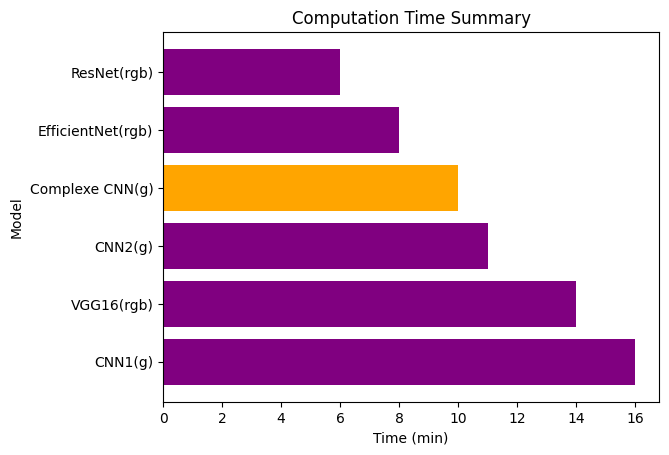

In [ ]:
import matplotlib.pyplot as plt

# Sort the dataframe by test accuracy in descending order
df2 = df.sort_values(by='Computation Time', ascending=False)

# Assign the color purple to all bars except for Model 6
colors = ['purple' for i in range(len(df2))]
colors[3] = 'orange'

# Create a bar chart of the validation accuracy for each model
plt.barh(df2['Model'], df2['Computation Time'], color=colors)

# Set the title and axis labels
plt.title('Computation Time Summary')
plt.ylabel('Model')
plt.xlabel('Time (min)')

# Show the plot
plt.show()

**Observations:**

- The two top models appear to have the shortest computation time, but in fact, their training stopped early because the validation accuracy was not improving (epoch 14 for ResNet and epoch 10 for EfficientNet).
- The **Complex CNN model with color mode grayscale had a relatively shorter computation time** compared to the other CNN models
- in addition to the accuracy metric, the computation time is an important metric to monitor if we want to deploy a model in production. If we had to use this model in the online education sector for example, and had to rely on our model to predict the emotion of a learner in an online course, we would need this information on an almost real time basis to be able to use it effectively during an online class.



-------------------------------------
## **5. Problem and solution summary**
-------------------------------------




###**The summary of the problem**

The problem is to solve a multi-class classification problem using Deep Learning techniques to develop a model that can automatically detect and classify facial expressions based on patterns in the data

So far, we trained models based on the following model architecture:
  1. **CNNs** - we developed a simple based model CNN1 and a slightly more complex model CNN2 and obtained good performance using the grayscale mode and data augmentation: CNN2 yielded 75% of accuracy on test set.
  2. **Transfer Learning** - we developed three models using pre-trained models (VGG16, ResNet V2 and EfficientNet B7) and obtained unsatisfactory performance: an accuracy equal to or lower than 60%. One of the reasons is that these models were pre-trained on color high-resolution images, while our dataset is composed of small size grayscale colors.
  3. **Complex CNN** - we therefore pursued with the CNNs and developed a more complex CNN with a high number of trainable parameters and this model gave a performance of 82% on test set using grayscale mode.

###**The reasons for the proposed solution design**

We propose to adopt **the Complex CNN model using the grayscale color mode** with 5 convolutional layers and 2 fully connected layers. This model will include regularisation techniques: 3 BatchNormalisation and a Dropout layer. Not only this model gives the **best performance** in terms of accuracy (82%), it is also **computationally efficient** in comparison with the other models, which is an important criteria if we want to deploy it in production.

![picture](https://drive.google.com/uc?id=101kgjK8pWXq3klQzBJedaJg5Fw9kzySg)


###**How it would affect the business**

By integrating this deep learning model into an application or existing system, this component would act as an automated face emotion detection classifier and provide feedback on the emotion detected that would trigger a response from the system.

In other words, **this automated and integrated system would support stakeholders in making decisions in a timely manner and with high accuracy** based on the patterns and information the deep learning model has learned from training data.

**Potential applications**

- **online education sector**: our model could predict the emotion of the learners in an online course, and inform the course leader so he could adapt his teaching methods according to the general sentiment of the class. The teacher would not just rely on one or two faces he can visualise on his screen and rely on an automated system that could scan through all the images of the learners.
- **recruitment sector**: our model could detect a preferred emotion in reaction to a stimuli for a certain role a company would like to recruit and shortlist candidates displaying that preferred emotion.
- **customer service sector**: our model could improve customer service video chat bots by providing an enhanced customer experience compared to text-based chat bots if we extend the training dataset to include other emotions such as anger, fear and disgust for example. We would of course need to do further training, testing and fine tuning on our model that could be a base model.

**Limitations**


- One of the limitations of the proposed Complex CNN is that it was **not as effective in distinguishing the ‘sad’ and ‘neutral’ emotions as it was with ‘happy’ and ‘surprise’**. The recognition rate is dependent on the data the model is trained.

- Another limitation is that the model is unable to distinguish the correct emotion in the **presence of facial occlusion** (accessory, shadow, hand).

- Although the model is the most computationnally efficient among the other models we explored, the training of the model **requires significant resources in terms of GPU**, which could also be a constraint when keeping the model up to date with regular training on new datasets. Moreover, in the case of a business scenario where predictions need to be made in real time or near real time, reducing latency is critical.

-------------------------------------------
## **6. Recommendation for implementation**
-------------------------------------------

###**Key recommendations**

- Data preprocessing including **data augmentation** to further improve the model's performance
- Training on a **larger dataset** that would contain more diverse and representative data
- **Expansion of types of emotions** including 'anger', 'fear' and 'disgust'
- **Cloud Computing** as a cost-effective solution: only pay for the computing resources used

###**Key actionables for stakeholders**

The next step before deployment into production is the **integration of the face emotion classsifier** into an application or system that can process and analyze images or video streams in real-time:
- **Real-time video processing**: for systems such as surveillance systems or video conferencing tools, the face emotion classifier can be integrated into the processing workflow allowing the system to analyze the emotions of individuals in the video feed or trigger specific actions based on detected emotions.
- **Internet of Things (IoT) devices**: for systems such as a retail kiosk or smart home security camera, the face emotion classifier can be deployed on a device to process images locally enabling the system to use the classifier to detect and respond to the people interacting with the device.


###**Expected benefits and costs**

Implementing a Complex CNN offers several benefits compared to simpler CNN models or Transfer Learning models.

**Expected benefits:**
  - Accuracy - the model achieved the highest level of a accuracy
  - Robustness - good generalisation allowing different genders, age and ethnicity
  - Flexiblity - unlike the pre-trained models, the model can be adapted to chosen color mode, size of the input images
  - Scalability - the model can handle large datasets

**Cost estimation to train the Complex CNN model:**

Based on the cloud service platform [Amazon SageMaker Canvas pricing](https://aws.amazon.com/sagemaker/canvas/pricing/), a training dataset of 50,000 images, the number of iterations and epochs used in this project to train the final model:

Estimate training charge for 50,000 images: $5.19</br>
Estimate number of epochs required for training: 20</br>
Estimate number of iterations: 35-50</br>

5.19 x 20 x 35 = 3,633</br>
5.19 x 20 x 50 = 5,190

It is estimated that the computational resources would **cost between 3,000 to 5,000 USD to train the model**.



###**Risk and challenges**

The stakeholders need to be aware of the potential risks and challenges.
- Handling sensitive personal data such as facial images and performing data augmentation techniques on them can pose **ethical and privacy concerns**.
- Moreover, the variety of images in the training data may not be as diverse and representative as in the real world which poses a **risk of bias**. Therefore collecting more representative data and labelling it could incur additional costs.
- Stakeholders also need to weigh the benefits of a complex model achieving high accuracy with its computational cost, as this would **increase the computational requirements**, especially if prediction needs to be provided on a real-time basis.

###**Further analysis**

Further analysis to improve the model's performance can be considered:

- One possibility to train the Complex CNN on a larger dataset is to **use datasets available to the public** (See Appendix 1 - A Summary of some Face Emotion Recognition databases). If the dataset is in color mode, an additional data preprocessing step to convert the images from 3-color channels to a single color channel would be necessary.

- Another possibility is to explore generating new images from existing ones using **Generative Adversarial Networks (GANs**) such as NVIDIA's StyleGAN2 or
Google's Rapid and Accurate Image Super-Resolution (RAISR). However labelling the new images generated would incur additional costs.



-------------------------------------------
## **Bibliography**
-------------------------------------------

[1] A. Mehrabian and S. Ferris, Inference of attitudes from nonverbal communication in two channel. *Journal of Consulting Psychology, 31*, 248-252 (1967).

[2] P. Weichbroch and W. Sroka, [A note of the affective computing systems and machines: a classification and appraisal](https://www.sciencedirect.com/science/article/pii/S1877050922013345) (2022).

[3] W. Mellouk and W. Handouzi, [Facial emotion recognition using deep learning: review](https://www.sciencedirect.com/science/article/pii/S1877050920318019)  (2020).

-------------------------------------------
## **Appendix**
-------------------------------------------

![picture](https://drive.google.com/uc?id=1yvSCofMtc40NNBPNWPakLsstbrbc8TV_)
**Source**: W. Mellouk and W. Handouzi, Facial emotion recognition using deep learning: review (2020)